In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Tài liệu đại cương/Học kỳ 5/Khai phá dữ liệu/FN_Data_mainin/MarketBasketAnalysis3.csv", sep=';')

<ipython-input-2-b076844bbe1a>:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("/content/drive/MyDrive/Tài liệu đại cương/Học kỳ 5/Khai phá dữ liệu/FN_Data_mainin/MarketBasketAnalysis3.csv", sep=';')


# **I. Quan sát dữ liệu nguyên bản**

In [ ]:
data

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,01.12.2010 08:26,"2,55",17850.0,United Kingdom
1,536365,WHITE METAL LANTERN,6,01.12.2010 08:26,"3,39",17850.0,United Kingdom
2,536365,CREAM CUPID HEARTS COAT HANGER,8,01.12.2010 08:26,"2,75",17850.0,United Kingdom
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,01.12.2010 08:26,"3,39",17850.0,United Kingdom
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,01.12.2010 08:26,"3,39",17850.0,United Kingdom
...,...,...,...,...,...,...,...
522059,581587,PACK OF 20 SPACEBOY NAPKINS,12,09.12.2011 12:50,"0,85",12680.0,France
522060,581587,CHILDREN'S APRON DOLLY GIRL,6,09.12.2011 12:50,"2,1",12680.0,France
522061,581587,CHILDRENS CUTLERY DOLLY GIRL,4,09.12.2011 12:50,"4,15",12680.0,France
522062,581587,CHILDRENS CUTLERY CIRCUS PARADE,4,09.12.2011 12:50,"4,15",12680.0,France


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522064 entries, 0 to 522063
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   BillNo      522064 non-null  object 
 1   Itemname    520609 non-null  object 
 2   Quantity    522064 non-null  int64  
 3   Date        522064 non-null  object 
 4   Price       522064 non-null  object 
 5   CustomerID  388023 non-null  float64
 6   Country     522064 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 27.9+ MB


## **Quan sát cột BillNo**

In [ ]:
data['BillNo'].describe()

count     522064
unique     21665
top       573585
freq        1114
Name: BillNo, dtype: int64

**Số mặt hàng được mua trong mỗi hóa đơn**

In [ ]:
BillNo_counts=data['BillNo'].value_counts()
BillNo_counts

573585    1114
581219     749
581492     731
580729     721
558475     705
          ... 
573107       1
553047       1
562532       1
562533       1
547487       1
Name: BillNo, Length: 21665, dtype: int64

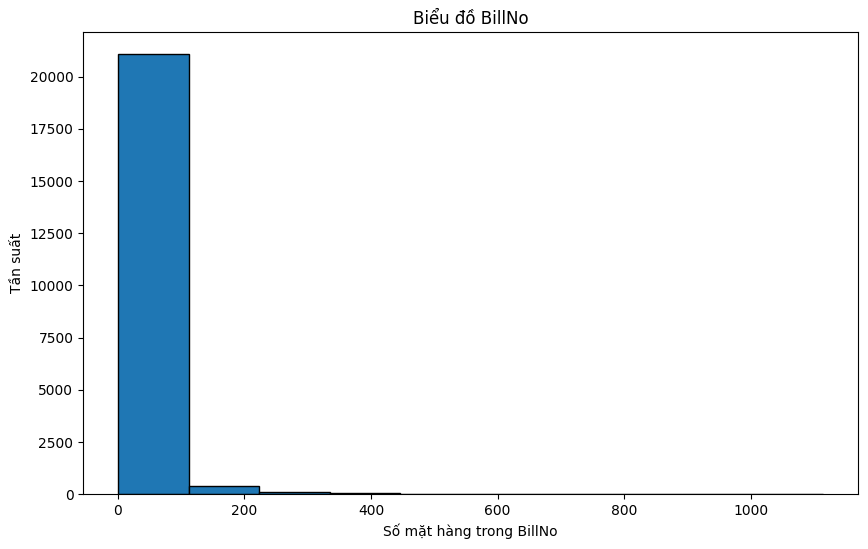

In [ ]:
# Tạo biểu đồ Histogram cho thuộc tính "BillNo"
plt.figure(figsize=(10, 6))
plt.hist(data['BillNo'].value_counts(), bins=10, edgecolor='black')
plt.title('Biểu đồ BillNo')
plt.xlabel('Số mặt hàng trong BillNo')
plt.ylabel('Tần suất')

# Hiển thị biểu đồ
plt.show()

**Nhận xét thấy phần lớn các hóa đơn có từ 0 đến 200 mặt hàng, nhóm tiến hành sử dụng bách phân vị để xác định các khoảng của số lượng mặt hàng**

In [ ]:
# Giả sử 'BillNo' là danh sách hoặc mảng chứa dữ liệu về tuổi
BillNo = data['BillNo'].value_counts()

# Xác định các phân vị (percentiles) muốn sử dụng
percentiles = [25, 50, 75]

# Tính toán các phân vị của dữ liệu
BillNo_percentiles = np.percentile(BillNo, percentiles)

# Hiển thị kết quả
for p, value in zip(percentiles, BillNo_percentiles):
    print(f"{p}th Percentile: {value}")

25th Percentile: 4.0
50th Percentile: 13.0
75th Percentile: 27.0


**Lấy ra số lượng cho từng khoảng**

In [ ]:
# Đếm số lượng mỗi giá trị trong cột "BillNo"
BillNo_counts = data['BillNo'].value_counts()

lst_count = [4, 13, 27, 1114]
for count in range(len(lst_count)):
    if count != 0:
        unique_values = BillNo_counts[BillNo_counts <= lst_count[count]][BillNo_counts > lst_count[count-1]].index.tolist()
    else:
        unique_values = BillNo_counts[BillNo_counts <= lst_count[count]].index.tolist()

    # In ra các giá trị
    print(f"Số lượng các giá trị xuất hiện ít hơn {lst_count[count]}:", len(unique_values))
    print(f"Các giá trị chỉ xuất hiện ít hơn {lst_count[count]}:", unique_values)

Số lượng các giá trị xuất hiện ít hơn 4: 5845
Các giá trị chỉ xuất hiện ít hơn 4: [555527, 539011, 572999, 578119, '564370', '570089', 544166, 537845, '562572', 579528, 544308, '570094', 539006, '564398', '564477', '569905', 553000, 572895, 547037, 578113, '570100', '562578', 558574, '563687', 552974, 556022, '571048', '563192', '563919', 546067, 551980, '571099', '571100', '563910', 572089, 579010, 579008, 552461, '571118', 545159, '572053', '572048', '563251', '572032', 558923, 559156, '563163', '564021', 572190, 556047, '563945', '563060', 544925, 551897, '563088', '570865', 558886, 579130, 579126, 545020, 579123, 579121, 545026, 546134, 545034, 559161, 538087, 556035, 545187, 552319, 546001, 546000, '563707', 538204, 552171, 555861, 545431, 545465, 578689, 545467, 578820, '563544', '571547', '563560', 538283, 545570, 578802, 559048, '571642', 555884, 578785, 538526, 552127, '563467', '563812', 559130, '563850', '563846', '571226', 559127, 558990, '563372', 538176, 545856, '563465',

Nhận xét: các hóa đơn trong bộ dữ liệu chứa các sản phẩm có trong hóa đơn, các sản phẩm thuộc cùng một hóa đơn có nghĩa là chúng được mua cùng với nhau

Hóa đơn được phân thành 4 khoảng dựa vào số lượng các mặt hàng có trong hóa đơn
- Khoảng 1 bao gồm 5845 sản phẩm có từ 1 đến 4 mặt hàng
- Khoảng 2 bao gồm 5119 sản phẩm có từ 5 đến 13 mặt hàng
- Khoảng 3 bao gồm 5441 sản phẩm có từ 14 đến 27 mặt hàng
- Khoảng 4 bao gồm 5260 sản phẩm có từ 28 đến 1114 mặt hàng

=> Đề xuất chỉ thực hiện phân tích luật kết hợp dựa trên nhóm các hóa đơn nằm ở khoảng 4, vì đây là khoảng tập trung những hóa đơn có số lượng các mặt hàng nhiều, những hóa đơn quan trọng để tìm ra luật kết hợp. Ngoài ra việc chỉ thực hiện tìm kiếm luật kết hợp trên 1 khoảng chủ yếu chứ không thực hiện trên toàn bộ hóa đơn sẽ làm giảm độ phức tạp cho thuật toán, giảm chi phí nghiên cứu.

## **Quan sát cột Itemname**

**Là cột tên của sản phẩm**

In [ ]:
data['Itemname'].describe()

count                                 520609
unique                                  4185
top       WHITE HANGING HEART T-LIGHT HOLDER
freq                                    2269
Name: Itemname, dtype: object

**Số lượt bán ra của mỗi sản phẩm**

In [ ]:
data["Itemname"].value_counts()

WHITE HANGING HEART T-LIGHT HOLDER     2269
JUMBO BAG RED RETROSPOT                2087
REGENCY CAKESTAND 3 TIER               1930
PARTY BUNTING                          1677
LUNCH BAG RED RETROSPOT                1570
                                       ... 
FOOD COVER WITH BEADS , SET 2 SIZES       1
POLYESTER FILLER PAD 60x40cm              1
damages/credits from ASOS.                1
samples                                   1
PAPER CRAFT , LITTLE BIRDIE               1
Name: Itemname, Length: 4185, dtype: int64

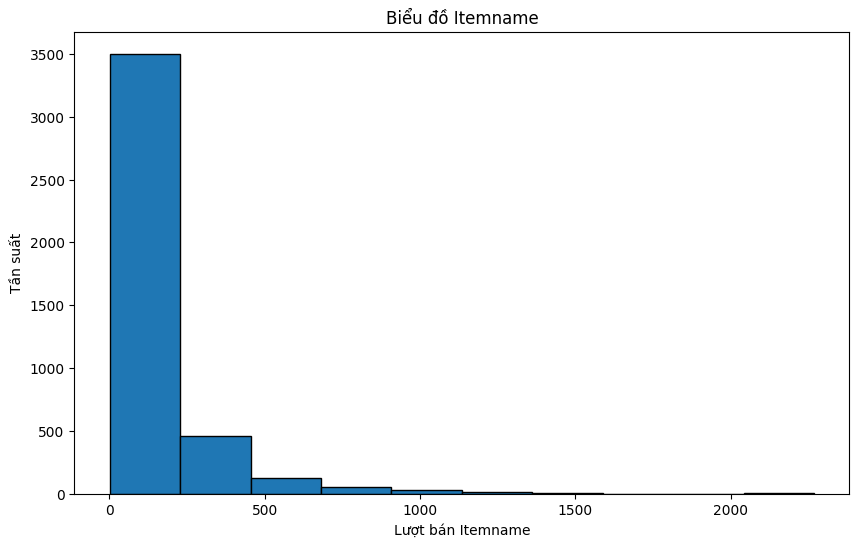

In [ ]:
# Tạo biểu đồ Histogram cho thuộc tính "Itemname"
plt.figure(figsize=(10, 6))
plt.hist(data['Itemname'].value_counts(), bins=10, edgecolor='black')
plt.title('Biểu đồ Itemname')
plt.xlabel('Lượt bán Itemname')
plt.ylabel('Tần suất')

# Hiển thị biểu đồ
plt.show()

**Nhận xét thấy số mặt hàng có lượt bán tập trung nhiều chủ yếu dưới 500 lượt, nhóm tiến hành sử dụng bách phân vị để xác định các khoảng của lượt bán hàng**

In [ ]:
# Giả sử 'Itemname' là danh sách hoặc mảng chứa dữ liệu về tuổi
Itemname = data['Itemname'].value_counts()

# Xác định các phân vị (percentiles) muốn sử dụng
percentiles = [25, 50, 75]

# Tính toán các phân vị của dữ liệu
Itemname_percentiles = np.percentile(Itemname, percentiles)

# Hiển thị kết quả
for p, value in zip(percentiles, Itemname_percentiles):
    print(f"{p}th Percentile: {value}")

25th Percentile: 11.0
50th Percentile: 56.0
75th Percentile: 157.0


**Lấy ra số lượng cho từng khoảng**

In [ ]:
# Đếm số lượng mỗi giá trị trong cột "Itemname"
Itemname_counts = data['Itemname'].value_counts()

lst_count = [11, 56, 157, 2269]
for count in range(len(lst_count)):
    if count != .:
        unique_values = Itemname_counts[Itemname_counts <= lst_count[count]][Itemname_counts > lst_count[count-1]].index.tolist()
    else:
        unique_values = Itemname_counts[Itemname_counts <= lst_count[count]].index.tolist()

    # In ra các giá trị
    print(f"Số lượng các giá trị xuất hiện ít hơn {lst_count[count]}:", len(unique_values))
    print(f"Các giá trị chỉ xuất hiện ít hơn {lst_count[count]}:", unique_values)

Số lượng các giá trị xuất hiện ít hơn 11: 1059
Các giá trị chỉ xuất hiện ít hơn 11: ['TURQUOISE CRYSTAL+GLASS BRACELET', 'IVY HEART WREATH', 'ANGEL DECORATION WITH LACE PADDED', 'BLUE DAISY MOBILE', 'TEATIME PUSH DOWN RUBBER', 'MONEY BOX FIRST AID DESIGN', 'AMETHYST DIAMANTE EXPANDABLE RING', 'MEDIUM WHITE/PINK ROSE ART FLOWER', 'BLUE BLOSSOM HAIR CLIP', 'PINK CANDYSTUFT ARTIFICIAL FLOWER', 'BLUE TABLE RUN FLOWER', 'TUSCAN VILLA BIRD TABLE', 'CRYSTAL DIAMANTE EXPANDABLE RING', 'FLOWER GLASS GARLD NECKL36"AMETHYST', 'PINK HEART DOTS HOT WATER BOTTLE', 'ZINC HEART LATTICE 2 WALL PLANTER', 'PINK BREAKFAST CUP AND SAUCER', 'LETTER "T" BLING KEY RING', 'GREEN CHRISTMAS TREE STRING 20LIGHT', 'SET 10 CARDS 12 DAYS WRAP  17058', 'BOYS PARTY BAG', 'ENGLISH ROSE METAL WASTE BIN', 'DOLLY GIRL WALL ART', '2 DAISIES HAIR COMB', 'SILVER BLACK ORBIT BRACELET', 'EAU DE NILE JEWELLED T-LIGHT HOLDER', 'HANGING GLASS ETCHED TEALIGHT', 'BLUE MURANO TWIST NECKLACE', 'LARGE BONNE JAM JAR  T-LIGHT HOLDER', '

Nhận xét: các sản phẩm trong bộ dữ liệu là các sản phẩm trang trí nhà cửa, bữa tiệc, hộp quà, đồ nội thất nhà bếp

Sản phẩm được phân thành 4 khoảng dựa vào lượt bán ra
- Khoảng 1 bao gồm 1059 sản phẩm có từ 1 đến 11 lượt bán
- Khoảng 2 bao gồm 1039 sản phẩm có từ 12 đến 56 lượt bán
- Khoảng 3 bao gồm 1044 sản phẩm có từ 57 đến 157 lượt bán
- Khoảng 4 bao gồm 1043 sản phẩm có từ 158 đến 2269 lượt bán

=> Đề xuất chỉ thực hiện phân tích luật kết hợp dựa trên nhóm các sản phẩm có số lượt bán trên **500** lượt, vì đây là những sản phẩm có lượt bán ra nhiều, những sản phẩm có lượt bán ra thấp vd như 365 lần trong 1 năm không lại nhiều ý nghĩa khi thực hiện khai phá luật kết hợp. Ngoài ra việc chỉ thực hiện tìm kiếm luật kết hợp trên 1 khoảng chủ yếu chứ không thực hiện trên toàn bộ sản phẩm sẽ làm giảm độ phức tạp cho thuật toán, giảm chi phí nghiên cứu.

## **Quan sát cột Quantity**

Là cột số lượng của sản phẩm trong hóa đơn

In [ ]:
data["Quantity"].describe()

count    522064.000000
mean         10.090435
std         161.110525
min       -9600.000000
25%           1.000000
50%           3.000000
75%          10.000000
max       80995.000000
Name: Quantity, dtype: float64

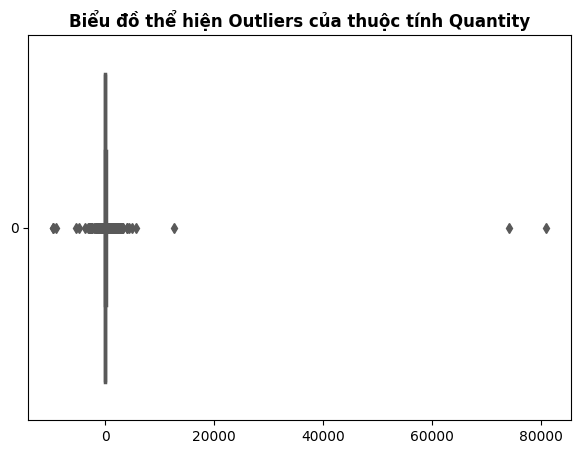

In [ ]:
# Vẽ biểu đồ boxplot cho các thuộc tính được chọn
plt.figure(figsize=(7, 5))
sns.boxplot(data=data["Quantity"], orient="h", palette="Set2", linewidth=2.5)
plt.title(f"Biểu đồ thể hiện Outliers của thuộc tính Quantity", fontweight='bold')
# Hiển thị biểu đồ
plt.show()

In [ ]:
# Hiển thị các hàng có Quantity dưới 0
result = data[data['Quantity'] <= 0][['BillNo','Itemname', 'Quantity']]

# In kết quả
print(result)

        BillNo Itemname  Quantity
2359    536589      NaN       -10
4289    536764      NaN       -38
6998    536996      NaN       -20
6999    536997      NaN       -20
7000    536998      NaN        -6
...        ...      ...       ...
515634  581210    check       -26
515636  581212     lost     -1050
515637  581213    check       -30
517209  581226  missing      -338
519172  581422  smashed      -235

[1336 rows x 3 columns]


Nhận xét: Cột Quantity là cột chứa số lượng các item được mua trong hóa đơn
- Có 1336 dòng có dữ liệu âm, đây là những hàng có sản phẩm không xác định (NaN, check, missing, lost,...) => đề xuất xóa
- Cột này không đóng góp nhiều vào mục tiêu của đồ án => Xóa cột này ra khỏi bài toán

## **Quan sát cột Date**

In [ ]:
# Hiển thị kiểu dữ liệu của cột trước khi chuyển đổi
print("Kiểu dữ liệu trước khi chuyển đổi:")
print(data.dtypes)

# Chuyển dữ liệu của cột về dạng thời gian
data['Date'] = pd.to_datetime(data['Date'])

# Hiển thị kiểu dữ liệu của cột sau khi chuyển đổi
print("\nKiểu dữ liệu sau khi chuyển đổi:")
print(data.dtypes)

Kiểu dữ liệu trước khi chuyển đổi:
BillNo         object
Itemname       object
Quantity        int64
Date           object
Price          object
CustomerID    float64
Country        object
dtype: object

Kiểu dữ liệu sau khi chuyển đổi:
BillNo                object
Itemname              object
Quantity               int64
Date          datetime64[ns]
Price                 object
CustomerID           float64
Country               object
dtype: object


In [ ]:
data["Date"].value_counts()

2011-10-31 14:41:00    1114
2011-08-12 09:28:00     749
2011-09-12 10:03:00     731
2011-05-12 17:24:00     721
2011-06-29 15:58:00     705
                       ... 
2011-02-17 19:16:00       1
2011-02-11 11:24:00       1
2011-02-17 17:39:00       1
2011-05-20 14:04:00       1
2011-01-07 14:50:00       1
Name: Date, Length: 19641, dtype: int64

Tạo cột mới chứa các giá trị tháng và năm

In [ ]:
# Tạo cột mới cho tháng và năm
data['Month_Year'] = data['Date'].dt.to_period('M').astype('object')

In [ ]:
data['Month_Year'].value_counts()

2011-11    71148
2011-10    52182
2011-09    46575
2011-07    41969
2011-08    40738
2011-06    40292
2011-05    38429
2011-04    36218
2011-03    35223
2011-01    35199
2011-02    30750
2010-12    16623
2011-12    12099
2010-06     3793
2010-01     3061
2010-07     2929
2010-09     2749
2010-05     2709
2010-10     2637
2010-08     2574
2010-03     2103
2010-02     2064
Freq: M, Name: Month_Year, dtype: int64

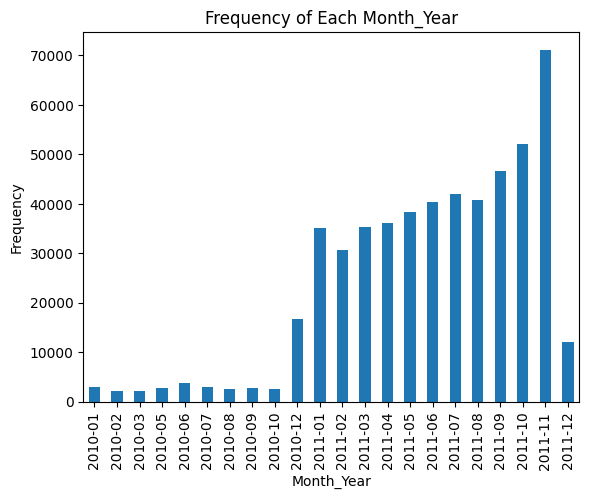

In [ ]:
# Đếm số lần xuất hiện của mỗi giá trị trong cột 'Month_Year'
Month_Year_counts = data['Month_Year'].value_counts()

# Sắp xếp lại theo thứ tự xuất hiện của các giá trị
Month_Year_counts = Month_Year_counts.sort_index()

# Vẽ biểu đồ thanh
Month_Year_counts.plot(kind='bar')
plt.xlabel('Month_Year')
plt.ylabel('Frequency')
plt.title('Frequency of Each Month_Year')
plt.xticks(rotation=90)  # (Tùy chọn) Xoay nhãn x để đọc dễ dàng hơn
plt.show()

Nhận xét: Bộ dữ liệu tập trung vào năm 2011, số liệu năm 2010 thiếu các tháng 4, 11
=> Đề xuất xóa cột tháng 10 và rời rạc hóa các giá trị cột Month_Year thành các quý để phục vụ mục đích đồ án

## **Quan sát cột Price**

Điều chỉnh dữ liệu về đúng dạng float

In [ ]:
# Thay thế dấu ',' bằng dấu '.' và chuyển định dạng thành float
data['Price'] = data['Price'].str.replace(',', '.').astype(float)

In [ ]:
data

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country,Month_Year
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,17850.0,United Kingdom,2010-01
1,536365,WHITE METAL LANTERN,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,2010-01
2,536365,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12 08:26:00,2.75,17850.0,United Kingdom,2010-01
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,2010-01
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,2010-01
...,...,...,...,...,...,...,...,...
522059,581587,PACK OF 20 SPACEBOY NAPKINS,12,2011-09-12 12:50:00,0.85,12680.0,France,2011-09
522060,581587,CHILDREN'S APRON DOLLY GIRL,6,2011-09-12 12:50:00,2.10,12680.0,France,2011-09
522061,581587,CHILDRENS CUTLERY DOLLY GIRL,4,2011-09-12 12:50:00,4.15,12680.0,France,2011-09
522062,581587,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-09-12 12:50:00,4.15,12680.0,France,2011-09


In [ ]:
data["Price"].describe()

count    522064.000000
mean          3.826801
std          41.900599
min      -11062.060000
25%           1.250000
50%           2.080000
75%           4.130000
max       13541.330000
Name: Price, dtype: float64

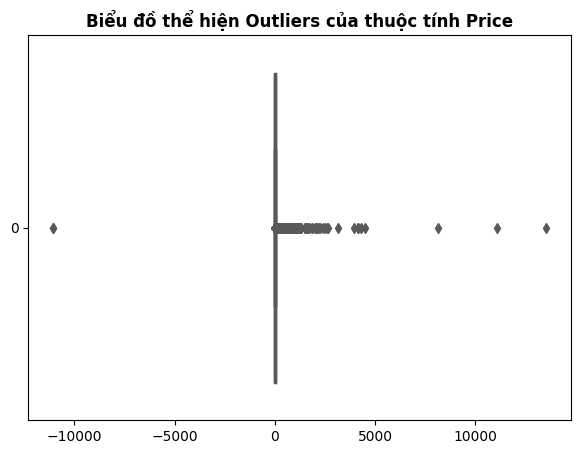

In [ ]:
# Vẽ biểu đồ boxplot cho các thuộc tính được chọn
plt.figure(figsize=(7, 5))
sns.boxplot(data=data["Price"], orient="h", palette="Set2", linewidth=2.5)
plt.title(f"Biểu đồ thể hiện Outliers của thuộc tính Price", fontweight='bold')
# Hiển thị biểu đồ
plt.show()

In [ ]:
# Hiển thị các hàng có Price bằng 0
result = data[data['Price'] == 0][['BillNo','Itemname', 'Price']]
result = result.dropna()

# In kết quả
print(result)

        BillNo                      Itemname  Price
6275    536941                        amazon    0.0
6276    536942                        amazon    0.0
7122    537032                             ?    0.0
9097    537197  ROUND CAKE TIN VINTAGE GREEN    0.0
12926   537425                         check    0.0
...        ...                           ...    ...
515637  581213                         check    0.0
517209  581226                       missing    0.0
518770  581406  POLYESTER FILLER PAD 45x45cm    0.0
518771  581406  POLYESTER FILLER PAD 40x40cm    0.0
519172  581422                       smashed    0.0

[1056 rows x 3 columns]


In [ ]:
# Hiển thị các hàng có Price dưới 0
result = data[data['Price'] < 0][['BillNo','Itemname', 'Price']]

# In kết quả
print(result)

         BillNo         Itemname     Price
288773  A563186  Adjust bad debt -11062.06
288774  A563187  Adjust bad debt -11062.06


Nhận xét:
- Có 2 dòng chứa dữ liệu âm => đề xuất xóa
- Có 1056 dòng chứa dữ liệu = 0, đây có thể là quà khuyến mãi hoặc tặng kèm => Đề xuất giữ lại
- Cột này không đóng góp nhiều vào mục tiêu của đồ án => Xóa cột này ra khỏi bài toán

## **Quan sát cột CustomerID**

In [ ]:
result1 = data['CustomerID']
result1

0         17850.0
1         17850.0
2         17850.0
3         17850.0
4         17850.0
           ...   
522059    12680.0
522060    12680.0
522061    12680.0
522062    12680.0
522063    12680.0
Name: CustomerID, Length: 522064, dtype: float64

In [ ]:
# Đếm tổng số giá trị NaN trong mỗi cột
nan_count_column = result1.isna().sum()
nan_count_column

134041

In [ ]:
result1 = result1.dropna()
# Chuyển đổi kiểu dữ liệu của cột 'CustomerID' sang chuỗi nếu nó không phải là chuỗi
result1 = result1.astype(object)

In [ ]:
# Đếm tổng số giá trị NaN trong mỗi cột
nan_count_column = result1.isna().sum()
nan_count_column

0

In [ ]:
result1.describe()

count     388023.0
unique      4297.0
top        17841.0
freq        7847.0
Name: CustomerID, dtype: float64

In [ ]:
CustomerID_counts=result1.value_counts()
CustomerID_counts

17841.0    7847
14096.0    5111
12748.0    4596
14606.0    2700
15311.0    2379
           ... 
12346.0       1
18268.0       1
17846.0       1
16742.0       1
15940.0       1
Name: CustomerID, Length: 4297, dtype: int64

Nhận xét:
- Cột CustomerID là cột thiếu 134041 giá trị, chiếm 25% tổng số dữ liệu
- Và cột này cũng không đóng quá nhiều vào mục tiêu của đồ án
=> xóa cột này ra khỏi bài toán

## **Quan sát cột Country**

In [ ]:
data['Country'].value_counts()

United Kingdom          487622
Germany                   9042
France                    8408
Spain                     2485
Netherlands               2363
Belgium                   2031
Switzerland               1967
Portugal                  1501
Australia                 1185
Norway                    1072
Italy                      758
Sweden                     451
Unspecified                446
Austria                    398
Poland                     330
Japan                      321
Israel                     295
Hong Kong                  284
Singapore                  222
Iceland                    182
USA                        179
Greece                     145
Malta                      112
United Arab Emirates        68
RSA                         58
Lebanon                     45
Lithuania                   35
Brazil                      32
Bahrain                     18
Saudi Arabia                 9
Name: Country, dtype: int64

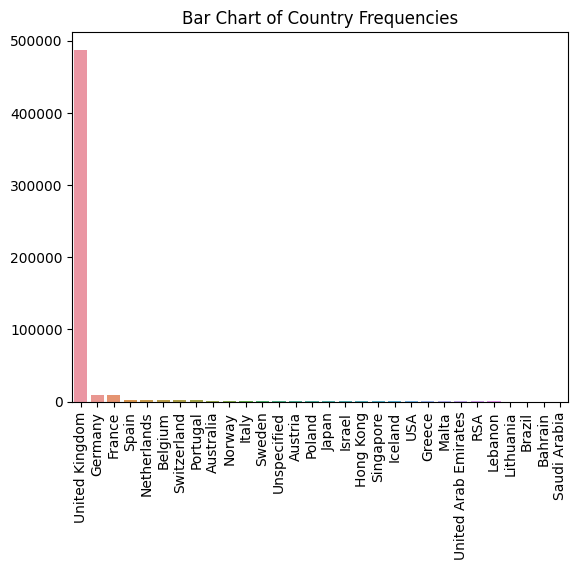

In [ ]:
# Đếm số lượng mỗi giá trị trong cột "Country"
value_counts = data['Country'].value_counts()

# Biểu đồ bar sử dụng seaborn
sns.barplot(x=value_counts.index, y=value_counts.values)

# Đặt tiêu đề cho biểu đồ
plt.title('Bar Chart of Country Frequencies')
plt.xticks(rotation=90)
# Hiển thị biểu đồ
plt.show()

Nhận xét:
- Cột Country chứa phần lớn giá trị là nước Anh với 487622 giá trị, chiếm 93% tổng số dữ liệu, phù hợp với mục tiêu đồ án
=> chỉ giữ lại các dữ liệu của nước Anh

# **II. Tiền xử lý dữ liệu**

**Tiến hành tiền xử lý dữ liệu để phục vụ cho mục tiêu của đồ án**

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Tài liệu đại cương/Học kỳ 5/Khai phá dữ liệu/FN_Data_mainin/Anh Cường/MarketBasketAnalysis3.csv")

<ipython-input-37-5c9eccce67c9>:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/drive/MyDrive/Tài liệu đại cương/Học kỳ 5/Khai phá dữ liệu/FN_Data_mainin/Anh Cường/MarketBasketAnalysis3.csv")


## **Tiến hành loại bỏ và chỉ giữ lại các dữ liệu của nước Anh**

In [ ]:
# Chọn các hàng có giá trị "United Kingdom" trong cột "Country"
df_uk = df[df['Country'] == 'United Kingdom']

# Xóa cột Country, CustomerID, Price, Quantity
df_uk = df_uk.drop(['Country', 'CustomerID', 'Price', 'Quantity'], axis=1)

# In DataFrame sau khi giữ lại các hàng
df_uk

,BillNo,Itemname,Date
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,01.12.2010 08:26
1,536365,WHITE METAL LANTERN,01.12.2010 08:26
2,536365,CREAM CUPID HEARTS COAT HANGER,01.12.2010 08:26
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,01.12.2010 08:26
4,536365,RED WOOLLY HOTTIE WHITE HEART.,01.12.2010 08:26
...,...,...,...
522044,581585,FAIRY TALE COTTAGE NIGHT LIGHT,09.12.2011 12:31
522045,581586,LARGE CAKE STAND HANGING STRAWBERY,09.12.2011 12:49
522046,581586,SET OF 3 HANGING OWLS OLLIE BEAK,09.12.2011 12:49
522047,581586,RED RETROSPOT ROUND CAKE TINS,09.12.2011 12:49


## **Kiểm tra giá trị null trong bộ dữ liệu**

In [ ]:
# Loại bỏ các dòng trùng nhau dựa trên toàn bộ các cột
df_uk = df_uk.drop_duplicates()

In [ ]:
nan_count_per_column = df_uk.isnull().sum()
nan_count_per_column

BillNo         0
Itemname    1455
Date           0
dtype: int64

**Xóa các giá trị null của cột Itemname vì ta không thể xác định được mặt hàng nào bị thiếu và vì số lượng thiếu không nhiều**

In [ ]:
# Xóa các giá trị null trong cột 'Itemname'
df_uk = df_uk.dropna(subset=['Itemname'])

In [ ]:
nan_count_per_column = df_uk.isnull().sum()
nan_count_per_column

BillNo      0
Itemname    0
Date        0
dtype: int64

## **Xử lý cột Date**

**Chuyển về đúng định dạng, tạo cột mới với gái trị là các quý trong năm sau đó xóa cột Date cũ và các dữ liệu của năm 2012 đi**

In [ ]:
# Chuyển dữ liệu của cột về dạng thời gian
df_uk['Date'] = pd.to_datetime(df_uk['Date'])

# Tạo cột mới cho quý và năm
df_uk['Quarter_Year'] = df_uk['Date'].dt.to_period('Q').astype(str)

# Xóa các dữ liệu trogn tháng 10
df_uk = df_uk[~df_uk['Quarter_Year'].str.contains('2010')]

# Xóa cột Date
df_uk = df_uk.drop(['Date'], axis=1)

df_uk

,BillNo,Itemname,Quarter_Year
41242,539993,JUMBO BAG PINK POLKADOT,2011Q2
41243,539993,BLUE POLKADOT WRAP,2011Q2
41244,539993,RED RETROSPOT WRAP,2011Q2
41245,539993,RECYCLING BAG RETROSPOT,2011Q2
41246,539993,RED RETROSPOT SHOPPER BAG,2011Q2
...,...,...,...
522044,581585,FAIRY TALE COTTAGE NIGHT LIGHT,2011Q3
522045,581586,LARGE CAKE STAND HANGING STRAWBERY,2011Q3
522046,581586,SET OF 3 HANGING OWLS OLLIE BEAK,2011Q3
522047,581586,RED RETROSPOT ROUND CAKE TINS,2011Q3


## **Xử lý cột BillNo**

In [ ]:
df_uk['BillNo'].value_counts()

573585    1108
581219     748
581492     731
580729     720
558475     703
          ... 
553394       1
553395       1
578256       1
553396       1
569876       1
Name: BillNo, Length: 17207, dtype: int64

In [ ]:
df_uk_BillNo = df_uk.copy()

In [ ]:
# Giả sử 'BillNo' là danh sách hoặc mảng chứa dữ liệu về tuổi
BillNo = df_uk_BillNo['BillNo'].value_counts()

# Xác định các phân vị (percentiles) muốn sử dụng
percentiles = [25, 50, 75]

# Tính toán các phân vị của dữ liệu
BillNo_percentiles = np.percentile(BillNo, percentiles)

# Hiển thị kết quả
for p, value in zip(percentiles, BillNo_percentiles):
    print(f"{p}th Percentile: {value}")

25th Percentile: 5.0
50th Percentile: 15.0
75th Percentile: 28.0


In [ ]:
# Đếm số lượng mỗi giá trị trong cột "BillNo"
BillNo_counts = df_uk_BillNo['BillNo'].value_counts()

lst_count = [5, 15, 28, 1108]
for count in range(len(lst_count)):
    if count != 0:
        unique_values = BillNo_counts[BillNo_counts <= lst_count[count]][BillNo_counts > lst_count[count-1]].index.tolist()
    else:
        unique_values = BillNo_counts[BillNo_counts <= lst_count[count]].index.tolist()

    # In ra các giá trị
    print(f"Số lượng các giá trị xuất hiện ít hơn {lst_count[count]}:", len(unique_values))
    print(f"Các giá trị chỉ xuất hiện ít hơn {lst_count[count]}:", unique_values)

Số lượng các giá trị xuất hiện ít hơn 5: 4380
Các giá trị chỉ xuất hiện ít hơn 5: [572310, 540500, 552947, 572340, 572931, 572487, 553040, 553160, 581358, 572914, 572892, 553095, 572902, 578252, 552890, 573378, 553093, 553371, 552806, 578384, 540274, 540544, 573128, 573000, 572760, 553499, 578284, 540542, '571911', 572466, 572320, 540170, 552891, 540983, '571836', 553227, 578304, 573308, 552837, 540263, '571935', 540802, 553469, 552960, 578220, 573404, 573285, 572515, 541008, 572733, 553317, 572870, 578294, 553475, 540405, 578375, 580076, 573416, 546863, 546785, 579128, 580104, 546832, 580102, 580100, 546877, 557041, '563260', 550643, '563247', 557024, 575657, 580090, 546767, 575619, 546752, '563616', 556922, 550755, 577313, '563832', '563836', '563841', 550811, '563857', 580139, 546526, '563956', '563982', 546442, '563204', 546985, '562422', '562614', '562842', 557256, '562719', 547080, 547082, 580060, '562589', 557121, '562573', 547105, 550461, '562462', 547220, 575850, 580063, 54704

**Giữ lại các hóa đơn ở khoảng 4, các hóa đơn có 29 đến 1108 mặt hàng**

In [ ]:
# Đếm số lần xuất hiện của từng giá trị trong cột 'BillNo'
value_counts = df_uk_BillNo['BillNo'].value_counts()

# Xóa các khoảng 1,2,3
values_to_remove = value_counts[value_counts < 29].index
df_uk_BillNo = df_uk_BillNo[~df_uk_BillNo['BillNo'].isin(values_to_remove)]

In [ ]:
df_uk_BillNo['BillNo'].value_counts()

573585    1108
581219     748
581492     731
580729     720
558475     703
          ... 
556017      29
570244      29
555577      29
555540      29
558542      29
Name: BillNo, Length: 4211, dtype: int64

In [ ]:
df_uk_BillNo

,BillNo,Itemname,Quarter_Year
41323,540013,SWEETHEART WIRE MAGAZINE RACK,2011Q2
41324,540013,CARD HOLDER GINGHAM HEART,2011Q2
41325,540013,JAM MAKING SET PRINTED,2011Q2
41326,540013,PACK OF 6 BIRDY GIFT TAGS,2011Q2
41327,540013,SET/20 RED RETROSPOT PAPER NAPKINS,2011Q2
...,...,...,...
521986,581579,CHRISTMAS LIGHTS 10 REINDEER,2011Q3
521987,581579,JUMBO BAG ALPHABET,2011Q3
521988,581579,JUMBO BAG VINTAGE CHRISTMAS,2011Q3
521989,581579,JUMBO BAG 50'S CHRISTMAS,2011Q3


## **Xử lý cột Itemname**

**Quan sát cột Itemname**

In [ ]:
df_uk['Itemname'].value_counts()

WHITE HANGING HEART T-LIGHT HOLDER    1942
JUMBO BAG RED RETROSPOT               1825
PARTY BUNTING                         1550
REGENCY CAKESTAND 3 TIER              1529
LUNCH BAG RED RETROSPOT               1316
                                      ... 
to push order througha s stock was       1
PINK CHERRY LIGHTS                       1
Printing smudges/thrown away             1
BLUE CRYSTAL BOOT PHONE CHARM            1
PAPER CRAFT , LITTLE BIRDIE              1
Name: Itemname, Length: 4073, dtype: int64

In [ ]:
df_uk_Itemname = df_uk.copy()

In [ ]:
Itemname = df_uk_Itemname['Itemname'].value_counts()

# Xác định các phân vị (percentiles) muốn sử dụng
percentiles = [25, 50, 75]

# Tính toán các phân vị của dữ liệu
Itemname_percentiles = np.percentile(Itemname, percentiles)

# Hiển thị kết quả
for p, value in zip(percentiles, Itemname_percentiles):
    print(f"{p}th Percentile: {value}")

25th Percentile: 11.0
50th Percentile: 50.0
75th Percentile: 134.0


In [ ]:
# Đếm số lượng mỗi giá trị trong cột "Itemname"
Itemname_counts = df_uk_Itemname['Itemname'].value_counts()

lst_count = [11, 50, 134, 1942]
for count in range(len(lst_count)):
    if count != 0:
        unique_values = Itemname_counts[Itemname_counts <= lst_count[count]][Itemname_counts > lst_count[count-1]].index.tolist()
    else:
        unique_values = Itemname_counts[Itemname_counts <= lst_count[count]].index.tolist()

    # In ra các giá trị
    print(f"Số lượng các giá trị xuất hiện ít hơn {lst_count[count]}:", len(unique_values))
    print(f"Các giá trị chỉ xuất hiện ít hơn {lst_count[count]}:", unique_values)

Số lượng các giá trị xuất hiện ít hơn 11: 1056
Các giá trị chỉ xuất hiện ít hơn 11: ['DIAMANTE HAIR GRIP PACK/2 RUBY', 'STRIPY DESIGN SHOWER CAP', 'RUBY DROP CHANDELIER EARRINGS', 'FUSCHIA VOILE POINTY SHOE DEC', 'SET OF 72 GREEN PAPER DOILIES', 'BATHROOM SCALES, TROPICAL BEACH', 'COPPER/OLIVE GREEN FLOWER NECKLACE', 'CAROUSEL PONIES BABY BIB', 'FLOOR LAMP SHADE WOOD BASE', 'MONEY BOX FIRST AID DESIGN', 'DOLLCRAFT BOY JEAN-PAUL', 'PERIWINKLE T-LIGHT HOLDER', 'DOLLY GIRL WALL ART', 'PINK OVAL SHAPE TRINKET BOX', 'AQUA BERTIE GLASS BEAD BAG CHARM', 'PINK PARTY SUNGLASSES', 'NECKLACE+BRACELET SET BLUE HIBISCUS', 'ENGLISH ROSE METAL WASTE BIN', 'BOYS PARTY BAG', 'BLACK SMALL GLASS CAKE STAND', '12 PINK HEN+CHICKS IN BASKET', 'FLOWERS TILE HOOK', 'BLUE/YELLOW FLOWER DESIGN BIG MUG', 'GOLD M PEARL  ORBIT NECKLACE', 'SET 10 CARDS 12 DAYS WRAP  17058', 'RETRO PILL BOX , REVOLUTIONARY', 'TURQUOISE CRYSTAL+GLASS BRACELET', 'BLUE TRAVEL FIRST AID KIT', 'METAL TUBE CHIME ON BAMBOO', 'RETRO PINK BA

**Giữ lại các sản phẩm có trên 500 lượt bán**

In [ ]:
# Đếm số lần xuất hiện của từng giá trị trong cột 'Itemname'
value_counts = df_uk_Itemname['Itemname'].value_counts()

# Giữ lại các sản phẩm có trên 500 lượt bán
values_to_remove = value_counts[value_counts < 500].index
df_uk_Itemname = df_uk_Itemname[~df_uk_Itemname['Itemname'].isin(values_to_remove)]

In [ ]:
df_uk_Itemname['Itemname'].value_counts()

WHITE HANGING HEART T-LIGHT HOLDER    1942
JUMBO BAG RED RETROSPOT               1825
PARTY BUNTING                         1550
REGENCY CAKESTAND 3 TIER              1529
LUNCH BAG RED RETROSPOT               1316
                                      ... 
HOMEMADE JAM SCENTED CANDLES           516
72 SWEETHEART FAIRY CAKE CASES         512
60 CAKE CASES VINTAGE CHRISTMAS        506
RED RETROSPOT SHOPPER BAG              503
BOX OF 24 COCKTAIL PARASOLS            503
Name: Itemname, Length: 130, dtype: int64

**Có 130 sản phẩm có số lượt bán trên 500 lần**

In [ ]:
df_uk_Itemname

,BillNo,Itemname,Quarter_Year
41242,539993,JUMBO BAG PINK POLKADOT,2011Q2
41245,539993,RECYCLING BAG RETROSPOT,2011Q2
41246,539993,RED RETROSPOT SHOPPER BAG,2011Q2
41247,539993,JUMBO BAG RED RETROSPOT,2011Q2
41249,539993,JAM MAKING SET PRINTED,2011Q2
...,...,...,...
522034,581585,ALARM CLOCK BAKELIKE GREEN,2011Q3
522035,581585,ALARM CLOCK BAKELIKE RED,2011Q3
522038,581585,BOX OF 24 COCKTAIL PARASOLS,2011Q3
522039,581585,ANTIQUE SILVER T-LIGHT GLASS,2011Q3


## **Khởi tạo các bộ dữ liệu phục vụ thuật toán ECLAT**

**Sau khi đã tiền xử lý cho dữ liệu theo BillNo và Itemname ta tiến hành kết hợp 2 bộ dữ liệu với nhau để tạo thành bộ dữ liệu sử dụng ECLAT**

In [ ]:
# Kết hợp DataFrame chỉ giữ lại những dòng giống nhau
df_merged = pd.merge(df_uk_BillNo, df_uk_Itemname, on=['BillNo', 'Itemname', 'Quarter_Year'], how='inner')

In [ ]:
df_merged

,BillNo,Itemname,Quarter_Year
0,540013,JAM MAKING SET PRINTED,2011Q2
1,540013,SET/20 RED RETROSPOT PAPER NAPKINS,2011Q2
2,540013,REX CASH+CARRY JUMBO SHOPPER,2011Q2
3,540013,CHILLI LIGHTS,2011Q2
4,540013,CLOTHES PEGS RETROSPOT PACK 24,2011Q2
...,...,...,...
60270,581579,RABBIT NIGHT LIGHT,2011Q3
60271,581579,POPCORN HOLDER,2011Q3
60272,581579,PAPER CHAIN KIT RETROSPOT,2011Q3
60273,581579,JUMBO BAG ALPHABET,2011Q3


### **Khởi tạo bộ dữ liệu tổng cho năm 2011**

In [ ]:
df_2011 = df_merged[['BillNo','Itemname']].copy()

In [ ]:
df_2011['BillNo'].value_counts()

573585    116
581217     92
580729     90
581219     89
580115     87
         ... 
545019      1
575740      1
568202      1
577286      1
573387      1
Name: BillNo, Length: 4169, dtype: int64

In [ ]:
# Sử dụng get_dummies để tạo bảng dữ liệu mới
df_itemsets_2011 = pd.get_dummies(df_2011['Itemname']).groupby(df_2011['BillNo']).max().reset_index()
df_itemsets_2011

,BillNo,6 RIBBONS RUSTIC CHARM,60 CAKE CASES VINTAGE CHRISTMAS,60 TEATIME FAIRY CAKE CASES,72 SWEETHEART FAIRY CAKE CASES,ALARM CLOCK BAKELIKE GREEN,ALARM CLOCK BAKELIKE PINK,ALARM CLOCK BAKELIKE RED,ANTIQUE SILVER T-LIGHT GLASS,ASSORTED COLOUR BIRD ORNAMENT,...,STRAWBERRY CHARLOTTE BAG,TRADITIONAL KNITTING NANCY,TRAVEL CARD WALLET KEEP CALM,VICTORIAN GLASS HANGING T-LIGHT,VINTAGE SNAP CARDS,WHITE HANGING HEART T-LIGHT HOLDER,WOOD BLACK BOARD ANT WHITE FINISH,WOODEN FRAME ANTIQUE WHITE,WOODEN PICTURE FRAME WHITE FINISH,WOODLAND CHARLOTTE BAG
0,540013,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,540014,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,540019,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,540021,0,0,0,0,1,1,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4,540023,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4164,572037,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4165,572047,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
4166,572050,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
4167,572055,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


### **Khởi tạo bộ dữ liệu cho từng quý**

In [ ]:
df_merged['Quarter_Year'].value_counts()

2011Q3    16875
2011Q4    16359
2011Q2    14593
2011Q1    12448
Name: Quarter_Year, dtype: int64

In [ ]:
df_2011q1 = df_merged.loc[df_merged['Quarter_Year'] == '2011Q1'][['BillNo','Itemname']].copy()
df_2011q2 = df_merged.loc[df_merged['Quarter_Year'] == '2011Q2'][['BillNo','Itemname']].copy()
df_2011q3 = df_merged.loc[df_merged['Quarter_Year'] == '2011Q3'][['BillNo','Itemname']].copy()
df_2011q4 = df_merged.loc[df_merged['Quarter_Year'] == '2011Q4'][['BillNo','Itemname']].copy()



---



**Quý 1 năm 2011**

In [ ]:
df_2011q1

,BillNo,Itemname
1272,540994,SET/20 RED RETROSPOT PAPER NAPKINS
1273,540994,PACK OF 60 DINOSAUR CAKE CASES
1274,540994,PACK OF 72 RETROSPOT CAKE CASES
1275,540994,60 TEATIME FAIRY CAKE CASES
1276,540994,PACK OF 20 NAPKINS PANTRY DESIGN
...,...,...
58057,580367,ANTIQUE SILVER T-LIGHT GLASS
58058,580367,HANGING HEART ZINC T-LIGHT HOLDER
58059,580367,60 TEATIME FAIRY CAKE CASES
58060,580367,WHITE HANGING HEART T-LIGHT HOLDER


In [ ]:
# Sử dụng get_dummies để tạo bảng dữ liệu mới
df_tidsets_2011q1 = pd.get_dummies(df_2011q1['Itemname']).groupby(df_2011q1['BillNo']).max().reset_index()
df_tidsets_2011q1

,BillNo,6 RIBBONS RUSTIC CHARM,60 CAKE CASES VINTAGE CHRISTMAS,60 TEATIME FAIRY CAKE CASES,72 SWEETHEART FAIRY CAKE CASES,ALARM CLOCK BAKELIKE GREEN,ALARM CLOCK BAKELIKE PINK,ALARM CLOCK BAKELIKE RED,ANTIQUE SILVER T-LIGHT GLASS,ASSORTED COLOUR BIRD ORNAMENT,...,STRAWBERRY CHARLOTTE BAG,TRADITIONAL KNITTING NANCY,TRAVEL CARD WALLET KEEP CALM,VICTORIAN GLASS HANGING T-LIGHT,VINTAGE SNAP CARDS,WHITE HANGING HEART T-LIGHT HOLDER,WOOD BLACK BOARD ANT WHITE FINISH,WOODEN FRAME ANTIQUE WHITE,WOODEN PICTURE FRAME WHITE FINISH,WOODLAND CHARLOTTE BAG
0,540994,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,540995,0,0,0,0,0,1,0,0,1,...,0,0,0,1,1,1,0,1,1,0
2,541005,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,541012,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,541018,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
896,569369,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
897,569371,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
898,569372,0,1,1,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,1
899,569374,0,1,1,0,0,0,0,1,0,...,1,0,0,0,1,1,0,0,0,1




---



**Quý 2 năm 2011**

In [ ]:
df_2011q2

,BillNo,Itemname
0,540013,JAM MAKING SET PRINTED
1,540013,SET/20 RED RETROSPOT PAPER NAPKINS
2,540013,REX CASH+CARRY JUMBO SHOPPER
3,540013,CHILLI LIGHTS
4,540013,CLOTHES PEGS RETROSPOT PACK 24
...,...,...
59315,580997,GARDENERS KNEELING PAD CUP OF TEA
59316,580997,HAND WARMER OWL DESIGN
59317,580997,SET/5 RED RETROSPOT LID GLASS BOWLS
59318,580999,VINTAGE SNAP CARDS


In [ ]:
# Sử dụng get_dummies để tạo bảng dữ liệu mới
df_tidsets_2011q2 = pd.get_dummies(df_2011q2['Itemname']).groupby(df_2011q2['BillNo']).max().reset_index()
df_tidsets_2011q2

,BillNo,6 RIBBONS RUSTIC CHARM,60 CAKE CASES VINTAGE CHRISTMAS,60 TEATIME FAIRY CAKE CASES,72 SWEETHEART FAIRY CAKE CASES,ALARM CLOCK BAKELIKE GREEN,ALARM CLOCK BAKELIKE PINK,ALARM CLOCK BAKELIKE RED,ANTIQUE SILVER T-LIGHT GLASS,ASSORTED COLOUR BIRD ORNAMENT,...,STRAWBERRY CHARLOTTE BAG,TRADITIONAL KNITTING NANCY,TRAVEL CARD WALLET KEEP CALM,VICTORIAN GLASS HANGING T-LIGHT,VINTAGE SNAP CARDS,WHITE HANGING HEART T-LIGHT HOLDER,WOOD BLACK BOARD ANT WHITE FINISH,WOODEN FRAME ANTIQUE WHITE,WOODEN PICTURE FRAME WHITE FINISH,WOODLAND CHARLOTTE BAG
0,540013,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,540014,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,540019,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,540021,0,0,0,0,1,1,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4,540023,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1003,569900,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1004,569910,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1005,569943,0,0,0,1,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
1006,569968,0,0,0,0,0,0,1,0,0,...,0,0,1,1,0,0,0,0,0,0




---



**Quý 3 năm 2011**

In [ ]:
df_2011q3

,BillNo,Itemname
572,540415,RECIPE BOX PANTRY YELLOW DESIGN
573,540415,REX CASH+CARRY JUMBO SHOPPER
574,540415,72 SWEETHEART FAIRY CAKE CASES
575,540415,PACK OF 72 RETROSPOT CAKE CASES
576,540415,REGENCY CAKESTAND 3 TIER
...,...,...
60270,581579,RABBIT NIGHT LIGHT
60271,581579,POPCORN HOLDER
60272,581579,PAPER CHAIN KIT RETROSPOT
60273,581579,JUMBO BAG ALPHABET


In [ ]:
# Sử dụng get_dummies để tạo bảng dữ liệu mới
df_tidsets_2011q3 = pd.get_dummies(df_2011q3['Itemname']).groupby(df_2011q3['BillNo']).max().reset_index()
df_tidsets_2011q3

,BillNo,6 RIBBONS RUSTIC CHARM,60 CAKE CASES VINTAGE CHRISTMAS,60 TEATIME FAIRY CAKE CASES,72 SWEETHEART FAIRY CAKE CASES,ALARM CLOCK BAKELIKE GREEN,ALARM CLOCK BAKELIKE PINK,ALARM CLOCK BAKELIKE RED,ANTIQUE SILVER T-LIGHT GLASS,ASSORTED COLOUR BIRD ORNAMENT,...,STRAWBERRY CHARLOTTE BAG,TRADITIONAL KNITTING NANCY,TRAVEL CARD WALLET KEEP CALM,VICTORIAN GLASS HANGING T-LIGHT,VINTAGE SNAP CARDS,WHITE HANGING HEART T-LIGHT HOLDER,WOOD BLACK BOARD ANT WHITE FINISH,WOODEN FRAME ANTIQUE WHITE,WOODEN PICTURE FRAME WHITE FINISH,WOODLAND CHARLOTTE BAG
0,540415,1,0,0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,540418,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,540464,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,540468,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4,540471,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1091,570237,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1092,570239,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1093,570241,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1094,570244,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0




---



**Quý 4 năm 2011**

In [ ]:
df_2011q4

,BillNo,Itemname
798,540551,JUMBO BAG WOODLAND ANIMALS
799,540551,JUMBO BAG OWLS
800,540551,RED RETROSPOT SHOPPER BAG
801,540551,WOODLAND CHARLOTTE BAG
802,540551,STRAWBERRY CHARLOTTE BAG
...,...,...
57466,579885,WOODEN PICTURE FRAME WHITE FINISH
57467,579885,ANTIQUE SILVER T-LIGHT GLASS
57468,579885,WHITE HANGING HEART T-LIGHT HOLDER
57469,579885,RED HANGING HEART T-LIGHT HOLDER


In [ ]:
# Sử dụng get_dummies để tạo bảng dữ liệu mới
df_tidsets_2011q4 = pd.get_dummies(df_2011q4['Itemname']).groupby(df_2011q4['BillNo']).max().reset_index()
df_tidsets_2011q4

,BillNo,6 RIBBONS RUSTIC CHARM,60 CAKE CASES VINTAGE CHRISTMAS,60 TEATIME FAIRY CAKE CASES,72 SWEETHEART FAIRY CAKE CASES,ALARM CLOCK BAKELIKE GREEN,ALARM CLOCK BAKELIKE PINK,ALARM CLOCK BAKELIKE RED,ANTIQUE SILVER T-LIGHT GLASS,ASSORTED COLOUR BIRD ORNAMENT,...,STRAWBERRY CHARLOTTE BAG,TRADITIONAL KNITTING NANCY,TRAVEL CARD WALLET KEEP CALM,VICTORIAN GLASS HANGING T-LIGHT,VINTAGE SNAP CARDS,WHITE HANGING HEART T-LIGHT HOLDER,WOOD BLACK BOARD ANT WHITE FINISH,WOODEN FRAME ANTIQUE WHITE,WOODEN PICTURE FRAME WHITE FINISH,WOODLAND CHARLOTTE BAG
0,540551,1,0,1,1,0,0,0,0,1,...,1,0,0,0,0,0,0,1,1,1
1,540566,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,540568,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,540595,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,540604,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1159,572037,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1160,572047,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
1161,572050,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
1162,572055,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


# **III. ECLAT**

In [ ]:
pip install pyECLAT

## **1. Xây dựng hàm tính Conf và Lift**

In [ ]:
from itertools import combinations

def find_association_rules(dict1, dict2):
    association_rules = {}

    for key2, support2 in dict2.items():
        items = key2.split(' & ')
        for r in range(1, len(items)):
            for combination in combinations(items, r):
                if all(item in dict1 for item in combination):
                    antecedent_support = min(dict1[item] for item in combination)
                    consequent = [item for item in items if item not in combination][0]
                    consequent_support = dict1[consequent]

                    confidence = support2 / antecedent_support
                    lift = support2 / (antecedent_support * consequent_support)

                    rule = f"{', '.join(combination)} => {consequent}"
                    association_rules[rule] = {
                        'confidence': confidence,
                        'lift': lift
                    }

    return association_rules

## **2. Quý 1 năm 2011**

In [ ]:
df_eclat2011q1 = df_tidsets_2011q1.drop("BillNo", axis=1).copy()
df_eclat2011q1

,6 RIBBONS RUSTIC CHARM,60 CAKE CASES VINTAGE CHRISTMAS,60 TEATIME FAIRY CAKE CASES,72 SWEETHEART FAIRY CAKE CASES,ALARM CLOCK BAKELIKE GREEN,ALARM CLOCK BAKELIKE PINK,ALARM CLOCK BAKELIKE RED,ANTIQUE SILVER T-LIGHT GLASS,ASSORTED COLOUR BIRD ORNAMENT,BAKING SET 9 PIECE RETROSPOT,...,STRAWBERRY CHARLOTTE BAG,TRADITIONAL KNITTING NANCY,TRAVEL CARD WALLET KEEP CALM,VICTORIAN GLASS HANGING T-LIGHT,VINTAGE SNAP CARDS,WHITE HANGING HEART T-LIGHT HOLDER,WOOD BLACK BOARD ANT WHITE FINISH,WOODEN FRAME ANTIQUE WHITE,WOODEN PICTURE FRAME WHITE FINISH,WOODLAND CHARLOTTE BAG
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,1,0,...,0,0,0,1,1,1,0,1,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
896,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
897,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
898,0,1,1,0,1,0,0,0,0,1,...,0,1,0,0,0,0,0,0,1,1
899,0,1,1,0,0,0,0,1,0,0,...,1,0,0,0,1,1,0,0,0,1


In [ ]:
# Chuyển đổi dataframe thành danh sách các danh sách
transactions2011q1 = df_eclat2011q1.apply(lambda row: list(df_eclat2011q1.columns[row == 1]), axis=1).tolist()

# In ra một số giao dịch đầu tiên để kiểm tra
print(transactions2011q1[:5])

[['60 TEATIME FAIRY CAKE CASES', 'DOORMAT RED RETROSPOT', 'PACK OF 20 NAPKINS PANTRY DESIGN', 'PACK OF 60 DINOSAUR CAKE CASES', 'PACK OF 72 RETROSPOT CAKE CASES', 'RETROSPOT TEA SET CERAMIC 11 PC', 'SET/20 RED RETROSPOT PAPER NAPKINS'], ['ALARM CLOCK BAKELIKE PINK', 'ASSORTED COLOUR BIRD ORNAMENT', 'CHARLOTTE BAG PINK POLKADOT', 'CHARLOTTE BAG SUKI DESIGN', 'CLOTHES PEGS RETROSPOT PACK 24', 'DOTCOM POSTAGE', 'GUMBALL COAT RACK', 'HANGING HEART JAR T-LIGHT HOLDER', 'HANGING HEART ZINC T-LIGHT HOLDER', 'HOT BATHS METAL SIGN', 'HOT WATER BOTTLE I AM SO POORLY', 'JUMBO BAG OWLS', 'JUMBO BAG RED RETROSPOT', 'JUMBO BAG STRAWBERRY', 'JUMBO STORAGE BAG SKULLS', 'JUMBO STORAGE BAG SUKI', 'LUNCH BAG CARS BLUE', 'LUNCH BAG DOLLY GIRL DESIGN', 'LUNCH BAG PINK POLKADOT', 'LUNCH BAG RED RETROSPOT', 'NATURAL SLATE HEART CHALKBOARD', 'PACK OF 72 RETROSPOT CAKE CASES', 'PAPER BUNTING RETROSPOT', 'PAPER CHAIN KIT RETROSPOT', 'PARTY BUNTING', 'PINK CREAM FELT CRAFT TRINKET BOX', 'RECIPE BOX PANTRY YELLOW

In [ ]:
# chuyển đổi thành dataframe để sử dụng thư viện ECLAT
data_eclat2011q1=pd.DataFrame(transactions2011q1)
data_eclat2011q1

,0,1,2,3,4,5,6,7,8,9,...,77,78,79,80,81,82,83,84,85,86
0,60 TEATIME FAIRY CAKE CASES,DOORMAT RED RETROSPOT,PACK OF 20 NAPKINS PANTRY DESIGN,PACK OF 60 DINOSAUR CAKE CASES,PACK OF 72 RETROSPOT CAKE CASES,RETROSPOT TEA SET CERAMIC 11 PC,SET/20 RED RETROSPOT PAPER NAPKINS,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,ALARM CLOCK BAKELIKE PINK,ASSORTED COLOUR BIRD ORNAMENT,CHARLOTTE BAG PINK POLKADOT,CHARLOTTE BAG SUKI DESIGN,CLOTHES PEGS RETROSPOT PACK 24,DOTCOM POSTAGE,GUMBALL COAT RACK,HANGING HEART JAR T-LIGHT HOLDER,HANGING HEART ZINC T-LIGHT HOLDER,HOT BATHS METAL SIGN,...,None,None,None,None,None,None,None,None,None,None
2,HEART OF WICKER SMALL,JUMBO BAG BAROQUE BLACK WHITE,JUMBO BAG RED RETROSPOT,JUMBO SHOPPER VINTAGE RED PAISLEY,JUMBO STORAGE BAG SUKI,LUNCH BAG SPACEBOY DESIGN,SPACEBOY LUNCH BOX,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,LUNCH BAG BLACK SKULL.,LUNCH BAG SPACEBOY DESIGN,LUNCH BAG WOODLAND,PACK OF 60 DINOSAUR CAKE CASES,PACK OF 72 SKULL CAKE CASES,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,BATHROOM METAL SIGN,COOK WITH WINE METAL SIGN,DOORMAT NEW ENGLAND,DOORMAT RED RETROSPOT,DOORMAT UNION FLAG,GIN + TONIC DIET METAL SIGN,HAND OVER THE CHOCOLATE SIGN,PAPER CHAIN KIT RETROSPOT,PARTY BUNTING,PLEASE ONE PERSON METAL SIGN,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
896,ANTIQUE SILVER T-LIGHT GLASS,HANGING HEART ZINC T-LIGHT HOLDER,HOMEMADE JAM SCENTED CANDLES,JAM MAKING SET PRINTED,NATURAL SLATE HEART CHALKBOARD,RECIPE BOX PANTRY YELLOW DESIGN,SET OF 3 BUTTERFLY COOKIE CUTTERS,SET OF 3 CAKE TINS PANTRY DESIGN,SET OF 3 HEART COOKIE CUTTERS,SET OF 6 SPICE TINS PANTRY DESIGN,...,None,None,None,None,None,None,None,None,None,None
897,ASSORTED COLOUR BIRD ORNAMENT,PAPER CHAIN KIT VINTAGE CHRISTMAS,RED HANGING HEART T-LIGHT HOLDER,SET OF 4 PANTRY JELLY MOULDS,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
898,60 CAKE CASES VINTAGE CHRISTMAS,60 TEATIME FAIRY CAKE CASES,ALARM CLOCK BAKELIKE GREEN,BAKING SET 9 PIECE RETROSPOT,BATHROOM METAL SIGN,BOX OF 24 COCKTAIL PARASOLS,CLOTHES PEGS RETROSPOT PACK 24,DOLLY GIRL LUNCH BOX,DOTCOM POSTAGE,GARDENERS KNEELING PAD CUP OF TEA,...,None,None,None,None,None,None,None,None,None,None
899,60 CAKE CASES VINTAGE CHRISTMAS,60 TEATIME FAIRY CAKE CASES,ANTIQUE SILVER T-LIGHT GLASS,BATHROOM METAL SIGN,CHARLOTTE BAG PINK POLKADOT,CHARLOTTE BAG SUKI DESIGN,COOK WITH WINE METAL SIGN,DOORMAT HEARTS,DOTCOM POSTAGE,GREEN REGENCY TEACUP AND SAUCER,...,None,None,None,None,None,None,None,None,None,None


In [ ]:
from pyECLAT import ECLAT
# Run ECLAT method
my_eclat2011q1 = ECLAT(data=data_eclat2011q1, verbose=True)

100%|██████████| 131/131 [00:00<00:00, 1583.92it/s]


In [ ]:
# một danh sách với tất cả tên của các item khác nhau
print(my_eclat2011q1.uniq_)
print("Số lượng các mặt hàng: ", len(my_eclat2011q1.uniq_))

['HEART OF WICKER SMALL', 'RETROSPOT TEA SET CERAMIC 11 PC', 'JAM MAKING SET PRINTED', 'HANGING HEART ZINC T-LIGHT HOLDER', 'LUNCH BAG RED RETROSPOT', 'SET OF 6 SPICE TINS PANTRY DESIGN', 'HOT WATER BOTTLE KEEP CALM', 'SPOTTY BUNTING', 'HOT WATER BOTTLE TEA AND SYMPATHY', 'RED RETROSPOT SHOPPER BAG', 'TRAVEL CARD WALLET KEEP CALM', 'JUMBO BAG APPLES', 'ALARM CLOCK BAKELIKE PINK', 'TRADITIONAL KNITTING NANCY', 'HOME BUILDING BLOCK WORD', '60 TEATIME FAIRY CAKE CASES', 'IVORY KITCHEN SCALES', 'JUMBO BAG ALPHABET', 'GINGERBREAD MAN COOKIE CUTTER', 'ANTIQUE SILVER T-LIGHT GLASS', 'LUNCH BOX I LOVE LONDON', 'PAPER CHAIN KIT RETROSPOT', 'ALARM CLOCK BAKELIKE RED', 'POPCORN HOLDER', 'STRAWBERRY CHARLOTTE BAG', 'SET OF 4 PANTRY JELLY MOULDS', 'JUMBO STORAGE BAG SUKI', 'LUNCH BAG PINK POLKADOT', 'COOK WITH WINE METAL SIGN', 'SET OF 3 HEART COOKIE CUTTERS', 'DOLLY GIRL LUNCH BOX', 'HEART OF WICKER LARGE', 'JUMBO  BAG BAROQUE BLACK WHITE', 'JUMBO STORAGE BAG SKULLS', 'REGENCY CAKESTAND 3 TIER', '

In [ ]:
# Chọn mức độ hỗ trợ tối thiểu
min_supporrt = 0.1
print(min_supporrt*len(transactions2011q1))

90.10000000000001


In [ ]:
# Sử dụng ECLAT để lấy ra các tập kết hợp
get_ECLAT_combine1_indexes2011q1, get_ECLAT_combine1_supports2011q1 = my_eclat2011q1.fit(min_support=min_supporrt,
                                                           min_combination=1,
                                                           max_combination = 1,
                                                           verbose=True)

Combination 1 by 1


71it [00:01, 42.17it/s]


In [ ]:
# Sử dụng ECLAT để lấy ra các tập kết hợp
get_ECLAT_combine2_indexes2011q1, get_ECLAT_combine2_supports2011q1 = my_eclat2011q1.fit(min_support=min_supporrt,
                                                           min_combination=2,
                                                           max_combination = 2,
                                                           verbose=True)

Combination 2 by 2


2485it [00:50, 48.88it/s]


In [ ]:
get_ECLAT_combine1_supports2011q1

{'HEART OF WICKER SMALL': 0.17980022197558268,
 'JAM MAKING SET PRINTED': 0.16759156492785793,
 'HANGING HEART ZINC T-LIGHT HOLDER': 0.10210876803551609,
 'LUNCH BAG RED RETROSPOT': 0.21198668146503885,
 'SET OF 6 SPICE TINS PANTRY DESIGN': 0.17869034406215317,
 'HOME BUILDING BLOCK WORD': 0.1076581576026637,
 '60 TEATIME FAIRY CAKE CASES': 0.14317425083240842,
 'GINGERBREAD MAN COOKIE CUTTER': 0.10987791342952276,
 'ALARM CLOCK BAKELIKE RED': 0.10210876803551609,
 'SET OF 4 PANTRY JELLY MOULDS': 0.15760266370699222,
 'JUMBO STORAGE BAG SUKI': 0.17425083240843509,
 'LUNCH BAG PINK POLKADOT': 0.13873473917869034,
 'COOK WITH WINE METAL SIGN': 0.12652608213096558,
 'SET OF 3 HEART COOKIE CUTTERS': 0.13873473917869034,
 'DOLLY GIRL LUNCH BOX': 0.1120976692563818,
 'HEART OF WICKER LARGE': 0.12874583795782463,
 'JUMBO  BAG BAROQUE BLACK WHITE': 0.14983351831298558,
 'JUMBO STORAGE BAG SKULLS': 0.10099889012208657,
 'REGENCY CAKESTAND 3 TIER': 0.21309655937846836,
 'WOODLAND CHARLOTTE BAG':

In [ ]:
get_ECLAT_combine2_supports2011q1

{'SET OF 6 SPICE TINS PANTRY DESIGN & SET OF 3 CAKE TINS PANTRY DESIGN': 0.10876803551609324,
 'JUMBO STORAGE BAG SUKI & JUMBO BAG RED RETROSPOT': 0.11098779134295228,
 'JUMBO  BAG BAROQUE BLACK WHITE & JUMBO BAG RED RETROSPOT': 0.10321864594894561,
 'JUMBO BAG RED RETROSPOT & JUMBO BAG PINK POLKADOT': 0.11653718091009989,
 'JUMBO BAG RED RETROSPOT & DOTCOM POSTAGE': 0.13318534961154274,
 'JUMBO BAG RED RETROSPOT & JUMBO SHOPPER VINTAGE RED PAISLEY': 0.10321864594894561,
 'ROSES REGENCY TEACUP AND SAUCER & GREEN REGENCY TEACUP AND SAUCER': 0.11098779134295228}

In [ ]:
rules_2011q1 = find_association_rules(get_ECLAT_combine1_supports2011q1, get_ECLAT_combine2_supports2011q1)

for rule, metrics in rules_2011q1.items():
    if round(metrics['confidence'],4) >= 0.7:
        print(f"Rule: {rule}")
        print(f"Confidence: {metrics['confidence']:.4f}")
        print(f"Lift: {metrics['lift']:.4f}")
        print()

Rule: JUMBO BAG PINK POLKADOT => JUMBO BAG RED RETROSPOT
Confidence: 0.7192
Lift: 3.0279

Rule: DOTCOM POSTAGE => JUMBO BAG RED RETROSPOT
Confidence: 0.7018
Lift: 2.9546

Rule: ROSES REGENCY TEACUP AND SAUCER => GREEN REGENCY TEACUP AND SAUCER
Confidence: 0.7812
Lift: 5.2141

Rule: GREEN REGENCY TEACUP AND SAUCER => ROSES REGENCY TEACUP AND SAUCER
Confidence: 0.7407
Lift: 5.2141



## **3. Quý 2 năm 2011**

In [ ]:
df_eclat2011q2 = df_tidsets_2011q2.drop("BillNo", axis=1).copy()
df_eclat2011q2

,6 RIBBONS RUSTIC CHARM,60 CAKE CASES VINTAGE CHRISTMAS,60 TEATIME FAIRY CAKE CASES,72 SWEETHEART FAIRY CAKE CASES,ALARM CLOCK BAKELIKE GREEN,ALARM CLOCK BAKELIKE PINK,ALARM CLOCK BAKELIKE RED,ANTIQUE SILVER T-LIGHT GLASS,ASSORTED COLOUR BIRD ORNAMENT,BAKING SET 9 PIECE RETROSPOT,...,STRAWBERRY CHARLOTTE BAG,TRADITIONAL KNITTING NANCY,TRAVEL CARD WALLET KEEP CALM,VICTORIAN GLASS HANGING T-LIGHT,VINTAGE SNAP CARDS,WHITE HANGING HEART T-LIGHT HOLDER,WOOD BLACK BOARD ANT WHITE FINISH,WOODEN FRAME ANTIQUE WHITE,WOODEN PICTURE FRAME WHITE FINISH,WOODLAND CHARLOTTE BAG
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,1,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1003,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1004,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1005,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
1006,0,0,0,0,0,0,1,0,0,0,...,0,0,1,1,0,0,0,0,0,0


In [ ]:
# Chuyển đổi dataframe thành danh sách các danh sách
transactions2011q2 = df_eclat2011q2.apply(lambda row: list(df_eclat2011q2.columns[row == 1]), axis=1).tolist()

# In ra một số giao dịch đầu tiên để kiểm tra
print(transactions2011q2[:5])

[['60 TEATIME FAIRY CAKE CASES', 'CHILLI LIGHTS', 'CLOTHES PEGS RETROSPOT PACK 24', 'JAM MAKING SET PRINTED', 'REX CASH+CARRY JUMBO SHOPPER', 'SET OF 3 HEART COOKIE CUTTERS', 'SET/20 RED RETROSPOT PAPER NAPKINS', 'SET/5 RED RETROSPOT LID GLASS BOWLS'], ['JUMBO BAG SPACEBOY DESIGN', 'PINK CREAM FELT CRAFT TRINKET BOX', 'RECYCLING BAG RETROSPOT', 'REGENCY CAKESTAND 3 TIER', 'WHITE HANGING HEART T-LIGHT HOLDER'], ['72 SWEETHEART FAIRY CAKE CASES', 'RETROSPOT TEA SET CERAMIC 11 PC'], ['ALARM CLOCK BAKELIKE GREEN', 'ALARM CLOCK BAKELIKE PINK', 'BOX OF 24 COCKTAIL PARASOLS', 'CHARLOTTE BAG SUKI DESIGN', 'CHILLI LIGHTS', 'DOLLY GIRL LUNCH BOX', 'JUMBO BAG OWLS', 'JUMBO BAG RED RETROSPOT', 'JUMBO BAG SPACEBOY DESIGN', 'JUMBO BAG WOODLAND ANIMALS', 'JUMBO SHOPPER VINTAGE RED PAISLEY', 'RED RETROSPOT SHOPPER BAG', 'SET OF 3 CAKE TINS PANTRY DESIGN', 'SET OF 6 SPICE TINS PANTRY DESIGN', 'STRAWBERRY CHARLOTTE BAG', 'WOODEN FRAME ANTIQUE WHITE'], ['JUMBO BAG PINK POLKADOT', 'JUMBO BAG STRAWBERRY', 

In [ ]:
# chuyển đổi thành dataframe để sử dụng thư viện ECLAT
data_eclat2011q2=pd.DataFrame(transactions2011q2)
data_eclat2011q2

,0,1,2,3,4,5,6,7,8,9,...,80,81,82,83,84,85,86,87,88,89
0,60 TEATIME FAIRY CAKE CASES,CHILLI LIGHTS,CLOTHES PEGS RETROSPOT PACK 24,JAM MAKING SET PRINTED,REX CASH+CARRY JUMBO SHOPPER,SET OF 3 HEART COOKIE CUTTERS,SET/20 RED RETROSPOT PAPER NAPKINS,SET/5 RED RETROSPOT LID GLASS BOWLS,None,None,...,None,None,None,None,None,None,None,None,None,None
1,JUMBO BAG SPACEBOY DESIGN,PINK CREAM FELT CRAFT TRINKET BOX,RECYCLING BAG RETROSPOT,REGENCY CAKESTAND 3 TIER,WHITE HANGING HEART T-LIGHT HOLDER,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,72 SWEETHEART FAIRY CAKE CASES,RETROSPOT TEA SET CERAMIC 11 PC,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,ALARM CLOCK BAKELIKE GREEN,ALARM CLOCK BAKELIKE PINK,BOX OF 24 COCKTAIL PARASOLS,CHARLOTTE BAG SUKI DESIGN,CHILLI LIGHTS,DOLLY GIRL LUNCH BOX,JUMBO BAG OWLS,JUMBO BAG RED RETROSPOT,JUMBO BAG SPACEBOY DESIGN,JUMBO BAG WOODLAND ANIMALS,...,None,None,None,None,None,None,None,None,None,None
4,JUMBO BAG PINK POLKADOT,JUMBO BAG STRAWBERRY,JUMBO SHOPPER VINTAGE RED PAISLEY,JUMBO STORAGE BAG SKULLS,LUNCH BAG SPACEBOY DESIGN,LUNCH BAG WOODLAND,PACK OF 60 PINK PAISLEY CAKE CASES,PACK OF 72 SKULL CAKE CASES,PARTY BUNTING,REGENCY CAKESTAND 3 TIER,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1003,JAM MAKING SET PRINTED,JUMBO BAG ALPHABET,JUMBO BAG APPLES,JUMBO BAG OWLS,JUMBO BAG RED RETROSPOT,JUMBO BAG STRAWBERRY,JUMBO BAG VINTAGE LEAF,JUMBO STORAGE BAG SUKI,LUNCH BAG BLACK SKULL.,LUNCH BAG APPLE DESIGN,...,None,None,None,None,None,None,None,None,None,None
1004,CHARLOTTE BAG PINK POLKADOT,CHARLOTTE BAG SUKI DESIGN,DOORMAT KEEP CALM AND COME IN,DOORMAT UNION FLAG,HAND WARMER OWL DESIGN,JUMBO BAG PINK POLKADOT,JUMBO BAG RED RETROSPOT,JUMBO STORAGE BAG SKULLS,LUNCH BAG BLACK SKULL.,LUNCH BAG ALPHABET DESIGN,...,None,None,None,None,None,None,None,None,None,None
1005,72 SWEETHEART FAIRY CAKE CASES,CHOCOLATE HOT WATER BOTTLE,CLOTHES PEGS RETROSPOT PACK 24,GINGERBREAD MAN COOKIE CUTTER,HOT WATER BOTTLE KEEP CALM,HOT WATER BOTTLE TEA AND SYMPATHY,PAPER CHAIN KIT 50'S CHRISTMAS,PAPER CHAIN KIT VINTAGE CHRISTMAS,PINK CREAM FELT CRAFT TRINKET BOX,POPCORN HOLDER,...,None,None,None,None,None,None,None,None,None,None
1006,ALARM CLOCK BAKELIKE RED,HAND OVER THE CHOCOLATE SIGN,JUMBO BAG 50'S CHRISTMAS,LARGE WHITE HEART OF WICKER,PLEASE ONE PERSON METAL SIGN,POPCORN HOLDER,SCOTTIE DOG HOT WATER BOTTLE,SET OF 3 CAKE TINS PANTRY DESIGN,TRAVEL CARD WALLET KEEP CALM,VICTORIAN GLASS HANGING T-LIGHT,...,None,None,None,None,None,None,None,None,None,None


In [ ]:
from pyECLAT import ECLAT
# Run ECLAT method
my_eclat2011q2 = ECLAT(data=data_eclat2011q2, verbose=True)

100%|██████████| 131/131 [00:00<00:00, 2154.89it/s]


In [ ]:
# một danh sách với tất cả tên của các item khác nhau
print(my_eclat2011q2.uniq_)
print("Số lượng các mặt hàng: ", len(my_eclat2011q2.uniq_))

['HEART OF WICKER SMALL', 'RETROSPOT TEA SET CERAMIC 11 PC', 'JAM MAKING SET PRINTED', 'HANGING HEART ZINC T-LIGHT HOLDER', 'SET OF 6 SPICE TINS PANTRY DESIGN', 'LUNCH BAG RED RETROSPOT', 'HOT WATER BOTTLE KEEP CALM', 'SPOTTY BUNTING', 'HOT WATER BOTTLE TEA AND SYMPATHY', 'RED RETROSPOT SHOPPER BAG', 'TRAVEL CARD WALLET KEEP CALM', 'JUMBO BAG APPLES', 'ALARM CLOCK BAKELIKE PINK', 'TRADITIONAL KNITTING NANCY', 'HOME BUILDING BLOCK WORD', '60 TEATIME FAIRY CAKE CASES', 'IVORY KITCHEN SCALES', 'JUMBO BAG ALPHABET', 'GINGERBREAD MAN COOKIE CUTTER', 'ANTIQUE SILVER T-LIGHT GLASS', 'LUNCH BOX I LOVE LONDON', 'PAPER CHAIN KIT RETROSPOT', 'ALARM CLOCK BAKELIKE RED', 'POPCORN HOLDER', 'STRAWBERRY CHARLOTTE BAG', 'SET OF 4 PANTRY JELLY MOULDS', 'JUMBO STORAGE BAG SUKI', 'LUNCH BAG PINK POLKADOT', 'COOK WITH WINE METAL SIGN', 'SET OF 3 HEART COOKIE CUTTERS', 'DOLLY GIRL LUNCH BOX', 'HEART OF WICKER LARGE', 'JUMBO  BAG BAROQUE BLACK WHITE', 'JUMBO STORAGE BAG SKULLS', 'REGENCY CAKESTAND 3 TIER', '

In [ ]:
# Chọn mức độ hỗ trợ tối thiểu
min_supporrt = 0.1
print(min_supporrt*len(transactions2011q2))

100.80000000000001


In [ ]:
# Sử dụng ECLAT để lấy ra các tập kết hợp
get_ECLAT_combine1_indexes2011q2, get_ECLAT_combine1_supports2011q2 = my_eclat2011q2.fit(min_support=min_supporrt,
                                                           min_combination=1,
                                                           max_combination = 1,
                                                           verbose=True)

Combination 1 by 1


75it [00:02, 32.52it/s]


In [ ]:
# Sử dụng ECLAT để lấy ra các tập kết hợp
get_ECLAT_combine2_indexes2011q2, get_ECLAT_combine2_supports2011q2 = my_eclat2011q2.fit(min_support=min_supporrt,
                                                           min_combination=2,
                                                           max_combination = 2,
                                                           verbose=True)

Combination 2 by 2


2775it [00:35, 78.21it/s]


In [ ]:
get_ECLAT_combine1_supports2011q2

{'HEART OF WICKER SMALL': 0.12103174603174603,
 'RETROSPOT TEA SET CERAMIC 11 PC': 0.1001984126984127,
 'JAM MAKING SET PRINTED': 0.10615079365079365,
 'LUNCH BAG RED RETROSPOT': 0.22420634920634921,
 'SPOTTY BUNTING': 0.18452380952380953,
 'TRAVEL CARD WALLET KEEP CALM': 0.1001984126984127,
 'JUMBO BAG APPLES': 0.16170634920634921,
 '60 TEATIME FAIRY CAKE CASES': 0.1359126984126984,
 'JUMBO BAG ALPHABET': 0.14186507936507936,
 'ALARM CLOCK BAKELIKE RED': 0.10714285714285714,
 'POPCORN HOLDER': 0.1001984126984127,
 'STRAWBERRY CHARLOTTE BAG': 0.11805555555555555,
 'SET OF 4 PANTRY JELLY MOULDS': 0.16964285714285715,
 'JUMBO STORAGE BAG SUKI': 0.1974206349206349,
 'LUNCH BAG PINK POLKADOT': 0.15079365079365079,
 'COOK WITH WINE METAL SIGN': 0.11706349206349206,
 'DOLLY GIRL LUNCH BOX': 0.11408730158730158,
 'JUMBO  BAG BAROQUE BLACK WHITE': 0.12698412698412698,
 'JUMBO STORAGE BAG SKULLS': 0.12103174603174603,
 'REGENCY CAKESTAND 3 TIER': 0.18948412698412698,
 'WOODLAND CHARLOTTE BAG': 

In [ ]:
get_ECLAT_combine2_supports2011q2

{'LUNCH BAG RED RETROSPOT & LUNCH BAG PINK POLKADOT': 0.1001984126984127,
 'LUNCH BAG RED RETROSPOT & LUNCH BAG SPACEBOY DESIGN': 0.10515873015873016,
 'LUNCH BAG RED RETROSPOT & LUNCH BAG  BLACK SKULL.': 0.11706349206349206,
 'LUNCH BAG RED RETROSPOT & LUNCH BAG SUKI DESIGN': 0.10714285714285714,
 'JUMBO STORAGE BAG SUKI & JUMBO BAG RED RETROSPOT': 0.12301587301587301,
 'JUMBO STORAGE BAG SUKI & JUMBO BAG PINK POLKADOT': 0.10218253968253968,
 'JUMBO STORAGE BAG SUKI & JUMBO SHOPPER VINTAGE RED PAISLEY': 0.1111111111111111,
 'JUMBO BAG RED RETROSPOT & JUMBO BAG PINK POLKADOT': 0.12003968253968254,
 'JUMBO BAG RED RETROSPOT & DOTCOM POSTAGE': 0.10218253968253968,
 'JUMBO BAG RED RETROSPOT & JUMBO SHOPPER VINTAGE RED PAISLEY': 0.11706349206349206,
 'GARDENERS KNEELING PAD KEEP CALM & GARDENERS KNEELING PAD CUP OF TEA': 0.10714285714285714,
 'ROSES REGENCY TEACUP AND SAUCER & GREEN REGENCY TEACUP AND SAUCER': 0.10317460317460317,
 'LUNCH BAG  BLACK SKULL. & LUNCH BAG SUKI DESIGN': 0.10515

In [ ]:
rules_2011q2 = find_association_rules(get_ECLAT_combine1_supports2011q2, get_ECLAT_combine2_supports2011q2)

for rule, metrics in rules_2011q2.items():
    if round(metrics['confidence'],4) >= 0.7:
        print(f"Rule: {rule}")
        print(f"Confidence: {metrics['confidence']:.4f}")
        print(f"Lift: {metrics['lift']:.4f}")
        print()

Rule: JUMBO BAG PINK POLKADOT => JUMBO BAG RED RETROSPOT
Confidence: 0.7516
Lift: 2.9708

Rule: GARDENERS KNEELING PAD CUP OF TEA => GARDENERS KNEELING PAD KEEP CALM
Confidence: 0.7606
Lift: 4.8831

Rule: ROSES REGENCY TEACUP AND SAUCER => GREEN REGENCY TEACUP AND SAUCER
Confidence: 0.7879
Lift: 5.8828

Rule: GREEN REGENCY TEACUP AND SAUCER => ROSES REGENCY TEACUP AND SAUCER
Confidence: 0.7704
Lift: 5.8828



## **4. Quý 3 năm 2011**

In [ ]:
df_eclat2011q3 = df_tidsets_2011q3.drop("BillNo", axis=1).copy()
df_eclat2011q3

,6 RIBBONS RUSTIC CHARM,60 CAKE CASES VINTAGE CHRISTMAS,60 TEATIME FAIRY CAKE CASES,72 SWEETHEART FAIRY CAKE CASES,ALARM CLOCK BAKELIKE GREEN,ALARM CLOCK BAKELIKE PINK,ALARM CLOCK BAKELIKE RED,ANTIQUE SILVER T-LIGHT GLASS,ASSORTED COLOUR BIRD ORNAMENT,BAKING SET 9 PIECE RETROSPOT,...,STRAWBERRY CHARLOTTE BAG,TRADITIONAL KNITTING NANCY,TRAVEL CARD WALLET KEEP CALM,VICTORIAN GLASS HANGING T-LIGHT,VINTAGE SNAP CARDS,WHITE HANGING HEART T-LIGHT HOLDER,WOOD BLACK BOARD ANT WHITE FINISH,WOODEN FRAME ANTIQUE WHITE,WOODEN PICTURE FRAME WHITE FINISH,WOODLAND CHARLOTTE BAG
0,1,0,0,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1091,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1092,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1093,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1094,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
# Chuyển đổi dataframe thành danh sách các danh sách
transactions2011q3 = df_eclat2011q3.apply(lambda row: list(df_eclat2011q3.columns[row == 1]), axis=1).tolist()

# In ra một số giao dịch đầu tiên để kiểm tra
print(transactions2011q3[:5])

[['6 RIBBONS RUSTIC CHARM', '72 SWEETHEART FAIRY CAKE CASES', 'ALARM CLOCK BAKELIKE GREEN', 'ALARM CLOCK BAKELIKE PINK', 'ALARM CLOCK BAKELIKE RED', 'CHARLOTTE BAG PINK POLKADOT', 'IVORY KITCHEN SCALES', 'PACK OF 20 NAPKINS PANTRY DESIGN', 'PACK OF 72 RETROSPOT CAKE CASES', 'PAPER BUNTING RETROSPOT', 'RECIPE BOX PANTRY YELLOW DESIGN', 'RED RETROSPOT CHARLOTTE BAG', 'REGENCY CAKESTAND 3 TIER', 'REX CASH+CARRY JUMBO SHOPPER', 'SET/20 RED RETROSPOT PAPER NAPKINS', 'SET/5 RED RETROSPOT LID GLASS BOWLS'], ['60 CAKE CASES VINTAGE CHRISTMAS', 'CHARLOTTE BAG PINK POLKADOT', 'CHARLOTTE BAG SUKI DESIGN', 'CHOCOLATE HOT WATER BOTTLE', 'CLOTHES PEGS RETROSPOT PACK 24', 'DOTCOM POSTAGE', 'GINGERBREAD MAN COOKIE CUTTER', 'GREEN REGENCY TEACUP AND SAUCER', 'HAND OVER THE CHOCOLATE   SIGN', 'HOT WATER BOTTLE I AM SO POORLY', 'JAM MAKING SET PRINTED', 'JUMBO BAG OWLS', 'JUMBO BAG PINK VINTAGE PAISLEY', 'JUMBO SHOPPER VINTAGE RED PAISLEY', 'LUNCH BAG RED RETROSPOT', 'LUNCH BOX I LOVE LONDON', 'PACK OF 6

In [ ]:
# chuyển đổi thành dataframe để sử dụng thư viện ECLAT
data_eclat2011q3=pd.DataFrame(transactions2011q3)
data_eclat2011q3

,0,1,2,3,4,5,6,7,8,9,...,82,83,84,85,86,87,88,89,90,91
0,6 RIBBONS RUSTIC CHARM,72 SWEETHEART FAIRY CAKE CASES,ALARM CLOCK BAKELIKE GREEN,ALARM CLOCK BAKELIKE PINK,ALARM CLOCK BAKELIKE RED,CHARLOTTE BAG PINK POLKADOT,IVORY KITCHEN SCALES,PACK OF 20 NAPKINS PANTRY DESIGN,PACK OF 72 RETROSPOT CAKE CASES,PAPER BUNTING RETROSPOT,...,None,None,None,None,None,None,None,None,None,None
1,60 CAKE CASES VINTAGE CHRISTMAS,CHARLOTTE BAG PINK POLKADOT,CHARLOTTE BAG SUKI DESIGN,CHOCOLATE HOT WATER BOTTLE,CLOTHES PEGS RETROSPOT PACK 24,DOTCOM POSTAGE,GINGERBREAD MAN COOKIE CUTTER,GREEN REGENCY TEACUP AND SAUCER,HAND OVER THE CHOCOLATE SIGN,HOT WATER BOTTLE I AM SO POORLY,...,None,None,None,None,None,None,None,None,None,None
2,BATHROOM METAL SIGN,BOX OF 24 COCKTAIL PARASOLS,GREEN REGENCY TEACUP AND SAUCER,HOMEMADE JAM SCENTED CANDLES,HOT BATHS METAL SIGN,RED HANGING HEART T-LIGHT HOLDER,REGENCY CAKESTAND 3 TIER,ROSES REGENCY TEACUP AND SAUCER,WHITE HANGING HEART T-LIGHT HOLDER,None,...,None,None,None,None,None,None,None,None,None,None
3,6 RIBBONS RUSTIC CHARM,CHARLOTTE BAG PINK POLKADOT,DOLLY GIRL LUNCH BOX,DOTCOM POSTAGE,HANGING HEART JAR T-LIGHT HOLDER,HANGING HEART ZINC T-LIGHT HOLDER,HOME BUILDING BLOCK WORD,JAM MAKING SET PRINTED,JUMBO BAG PINK POLKADOT,JUMBO BAG RED RETROSPOT,...,None,None,None,None,None,None,None,None,None,None
4,COLOUR GLASS T-LIGHT HOLDER HANGING,DOORMAT NEW ENGLAND,DOORMAT RED RETROSPOT,DOORMAT UNION FLAG,HOME BUILDING BLOCK WORD,LOVE BUILDING BLOCK WORD,STRAWBERRY CERAMIC TRINKET BOX,WHITE HANGING HEART T-LIGHT HOLDER,WOODEN FRAME ANTIQUE WHITE,None,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1091,DOORMAT KEEP CALM AND COME IN,DOORMAT UNION FLAG,HOT WATER BOTTLE I AM SO POORLY,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1092,HAND WARMER OWL DESIGN,PAPER CHAIN KIT 50'S CHRISTMAS,PAPER CHAIN KIT RETROSPOT,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1093,PINK CREAM FELT CRAFT TRINKET BOX,REX CASH+CARRY JUMBO SHOPPER,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1094,6 RIBBONS RUSTIC CHARM,PACK OF 72 RETROSPOT CAKE CASES,SET OF 60 PANTRY DESIGN CAKE CASES,WHITE HANGING HEART T-LIGHT HOLDER,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [ ]:
from pyECLAT import ECLAT
# Run ECLAT method
my_eclat2011q3 = ECLAT(data=data_eclat2011q3, verbose=True)

100%|██████████| 131/131 [00:00<00:00, 1775.02it/s]


In [ ]:
# một danh sách với tất cả tên của các item khác nhau
print(my_eclat2011q3.uniq_)
print("Số lượng các mặt hàng: ", len(my_eclat2011q3.uniq_))

['HEART OF WICKER SMALL', 'RETROSPOT TEA SET CERAMIC 11 PC', 'JAM MAKING SET PRINTED', 'HANGING HEART ZINC T-LIGHT HOLDER', 'SET OF 6 SPICE TINS PANTRY DESIGN', 'LUNCH BAG RED RETROSPOT', 'HOT WATER BOTTLE KEEP CALM', 'SPOTTY BUNTING', 'HOT WATER BOTTLE TEA AND SYMPATHY', 'RED RETROSPOT SHOPPER BAG', 'TRAVEL CARD WALLET KEEP CALM', 'JUMBO BAG APPLES', 'ALARM CLOCK BAKELIKE PINK', 'TRADITIONAL KNITTING NANCY', 'HOME BUILDING BLOCK WORD', '60 TEATIME FAIRY CAKE CASES', 'IVORY KITCHEN SCALES', 'JUMBO BAG ALPHABET', 'GINGERBREAD MAN COOKIE CUTTER', 'ANTIQUE SILVER T-LIGHT GLASS', 'LUNCH BOX I LOVE LONDON', 'PAPER CHAIN KIT RETROSPOT', 'ALARM CLOCK BAKELIKE RED', 'POPCORN HOLDER', 'STRAWBERRY CHARLOTTE BAG', 'SET OF 4 PANTRY JELLY MOULDS', 'JUMBO STORAGE BAG SUKI', 'LUNCH BAG PINK POLKADOT', 'COOK WITH WINE METAL SIGN', 'SET OF 3 HEART COOKIE CUTTERS', 'DOLLY GIRL LUNCH BOX', 'HEART OF WICKER LARGE', 'JUMBO  BAG BAROQUE BLACK WHITE', 'JUMBO STORAGE BAG SKULLS', 'REGENCY CAKESTAND 3 TIER', '

In [ ]:
# Chọn mức độ hỗ trợ tối thiểu
min_supporrt = 0.1
print(min_supporrt*len(transactions2011q3))

109.60000000000001


In [ ]:
# Sử dụng ECLAT để lấy ra các tập kết hợp
get_ECLAT_combine1_indexes2011q3, get_ECLAT_combine1_supports2011q3 = my_eclat2011q3.fit(min_support=min_supporrt,
                                                           min_combination=1,
                                                           max_combination = 1,
                                                           verbose=True)

Combination 1 by 1


80it [00:01, 50.10it/s]


In [ ]:
# Sử dụng ECLAT để lấy ra các tập kết hợp
get_ECLAT_combine2_indexes2011q3, get_ECLAT_combine2_supports2011q3 = my_eclat2011q3.fit(min_support=min_supporrt,
                                                           min_combination=2,
                                                           max_combination = 2,
                                                           verbose=True)

Combination 2 by 2


3160it [00:39, 79.09it/s]


In [ ]:
get_ECLAT_combine1_supports2011q3

{'HEART OF WICKER SMALL': 0.14051094890510948,
 'RETROSPOT TEA SET CERAMIC 11 PC': 0.11496350364963503,
 'JAM MAKING SET PRINTED': 0.15145985401459855,
 'LUNCH BAG RED RETROSPOT': 0.21076642335766424,
 'HOT WATER BOTTLE KEEP CALM': 0.1031021897810219,
 'SPOTTY BUNTING': 0.18704379562043796,
 'JUMBO BAG APPLES': 0.18339416058394162,
 '60 TEATIME FAIRY CAKE CASES': 0.10766423357664233,
 'JUMBO BAG ALPHABET': 0.15602189781021897,
 'ALARM CLOCK BAKELIKE RED': 0.1259124087591241,
 'POPCORN HOLDER': 0.1386861313868613,
 'STRAWBERRY CHARLOTTE BAG': 0.12408759124087591,
 'SET OF 4 PANTRY JELLY MOULDS': 0.15145985401459855,
 'JUMBO STORAGE BAG SUKI': 0.1989051094890511,
 'LUNCH BAG PINK POLKADOT': 0.17062043795620438,
 'DOLLY GIRL LUNCH BOX': 0.13777372262773724,
 'HEART OF WICKER LARGE': 0.13138686131386862,
 'JUMBO  BAG BAROQUE BLACK WHITE': 0.13686131386861314,
 'JUMBO STORAGE BAG SKULLS': 0.12043795620437957,
 'REGENCY CAKESTAND 3 TIER': 0.14324817518248176,
 'WOODLAND CHARLOTTE BAG': 0.114

In [ ]:
get_ECLAT_combine2_supports2011q3

{'LUNCH BAG RED RETROSPOT & LUNCH BAG  BLACK SKULL.': 0.10583941605839416,
 'LUNCH BAG RED RETROSPOT & LUNCH BAG APPLE DESIGN': 0.10036496350364964,
 'SPOTTY BUNTING & PARTY BUNTING': 0.10492700729927007,
 'JUMBO BAG APPLES & JUMBO STORAGE BAG SUKI': 0.10218978102189781,
 'JUMBO BAG APPLES & JUMBO BAG RED RETROSPOT': 0.11861313868613138,
 'JUMBO STORAGE BAG SUKI & JUMBO BAG RED RETROSPOT': 0.13686131386861314,
 'JUMBO STORAGE BAG SUKI & JUMBO SHOPPER VINTAGE RED PAISLEY': 0.1031021897810219,
 'JUMBO BAG RED RETROSPOT & JUMBO BAG PINK POLKADOT': 0.12956204379562045,
 'JUMBO BAG RED RETROSPOT & DOTCOM POSTAGE': 0.10401459854014598,
 'JUMBO BAG RED RETROSPOT & JUMBO SHOPPER VINTAGE RED PAISLEY': 0.11131386861313869,
 'LUNCH BAG SPACEBOY DESIGN & LUNCH BAG CARS BLUE': 0.10036496350364964,
 'LUNCH BAG CARS BLUE & LUNCH BAG  BLACK SKULL.': 0.10583941605839416,
 'GARDENERS KNEELING PAD KEEP CALM & GARDENERS KNEELING PAD CUP OF TEA': 0.11405109489051095}

In [ ]:
rules_2011q3 = find_association_rules(get_ECLAT_combine1_supports2011q3, get_ECLAT_combine2_supports2011q3)

for rule, metrics in rules_2011q3.items():
    if round(metrics['confidence'],4) >= 0.7:
        print(f"Rule: {rule}")
        print(f"Confidence: {metrics['confidence']:.4f}")
        print(f"Lift: {metrics['lift']:.4f}")
        print()

Rule: JUMBO BAG PINK POLKADOT => JUMBO BAG RED RETROSPOT
Confidence: 0.7435
Lift: 2.8195

Rule: DOTCOM POSTAGE => JUMBO BAG RED RETROSPOT
Confidence: 0.7355
Lift: 2.7892

Rule: GARDENERS KNEELING PAD CUP OF TEA => GARDENERS KNEELING PAD KEEP CALM
Confidence: 0.7962
Lift: 4.7946



## **5. Quý 4 năm 2011**

In [ ]:
df_eclat2011q4 = df_tidsets_2011q4.drop("BillNo", axis=1).copy()
df_eclat2011q4

,6 RIBBONS RUSTIC CHARM,60 CAKE CASES VINTAGE CHRISTMAS,60 TEATIME FAIRY CAKE CASES,72 SWEETHEART FAIRY CAKE CASES,ALARM CLOCK BAKELIKE GREEN,ALARM CLOCK BAKELIKE PINK,ALARM CLOCK BAKELIKE RED,ANTIQUE SILVER T-LIGHT GLASS,ASSORTED COLOUR BIRD ORNAMENT,BAKING SET 9 PIECE RETROSPOT,...,STRAWBERRY CHARLOTTE BAG,TRADITIONAL KNITTING NANCY,TRAVEL CARD WALLET KEEP CALM,VICTORIAN GLASS HANGING T-LIGHT,VINTAGE SNAP CARDS,WHITE HANGING HEART T-LIGHT HOLDER,WOOD BLACK BOARD ANT WHITE FINISH,WOODEN FRAME ANTIQUE WHITE,WOODEN PICTURE FRAME WHITE FINISH,WOODLAND CHARLOTTE BAG
0,1,0,1,1,0,0,0,0,1,0,...,1,0,0,0,0,0,0,1,1,1
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1159,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1160,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
1161,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
1162,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Chuyển đổi dataframe thành danh sách các danh sách
transactions2011q4 = df_eclat2011q4.apply(lambda row: list(df_eclat2011q4.columns[row == 1]), axis=1).tolist()

# In ra một số giao dịch đầu tiên để kiểm tra
print(transactions2011q4[:5])

[['6 RIBBONS RUSTIC CHARM', '60 TEATIME FAIRY CAKE CASES', '72 SWEETHEART FAIRY CAKE CASES', 'ASSORTED COLOUR BIRD ORNAMENT', 'BATHROOM METAL SIGN', 'CHARLOTTE BAG PINK POLKADOT', 'CHARLOTTE BAG SUKI DESIGN', 'DOTCOM POSTAGE', 'GINGERBREAD MAN COOKIE CUTTER', 'HANGING HEART ZINC T-LIGHT HOLDER', 'HOME BUILDING BLOCK WORD', 'HOT BATHS METAL SIGN', 'JAM MAKING SET PRINTED', 'JAM MAKING SET WITH JARS', 'JUMBO  BAG BAROQUE BLACK WHITE', 'JUMBO BAG OWLS', 'JUMBO BAG PINK VINTAGE PAISLEY', 'JUMBO BAG RED RETROSPOT', 'JUMBO BAG STRAWBERRY', 'JUMBO BAG WOODLAND ANIMALS', 'LOVE BUILDING BLOCK WORD', 'LUNCH BAG  BLACK SKULL.', 'NATURAL SLATE HEART CHALKBOARD', 'PACK OF 20 NAPKINS PANTRY DESIGN', 'PACK OF 60 DINOSAUR CAKE CASES', 'PACK OF 60 PINK PAISLEY CAKE CASES', 'PACK OF 72 RETROSPOT CAKE CASES', 'RECIPE BOX PANTRY YELLOW DESIGN', 'RECYCLING BAG RETROSPOT', 'RED RETROSPOT CHARLOTTE BAG', 'RED RETROSPOT SHOPPER BAG', 'SET OF 3 CAKE TINS PANTRY DESIGN', 'SET OF 6 SPICE TINS PANTRY DESIGN', 'ST

In [ ]:
# chuyển đổi thành dataframe để sử dụng thư viện ECLAT
data_eclat2011q4=pd.DataFrame(transactions2011q4)
data_eclat2011q4

,0,1,2,3,4,5,6,7,8,9,...,106,107,108,109,110,111,112,113,114,115
0,6 RIBBONS RUSTIC CHARM,60 TEATIME FAIRY CAKE CASES,72 SWEETHEART FAIRY CAKE CASES,ASSORTED COLOUR BIRD ORNAMENT,BATHROOM METAL SIGN,CHARLOTTE BAG PINK POLKADOT,CHARLOTTE BAG SUKI DESIGN,DOTCOM POSTAGE,GINGERBREAD MAN COOKIE CUTTER,HANGING HEART ZINC T-LIGHT HOLDER,...,None,None,None,None,None,None,None,None,None,None
1,72 SWEETHEART FAIRY CAKE CASES,CLOTHES PEGS RETROSPOT PACK 24,GINGERBREAD MAN COOKIE CUTTER,GUMBALL COAT RACK,PACK OF 60 DINOSAUR CAKE CASES,PACK OF 60 PINK PAISLEY CAKE CASES,PAPER BUNTING RETROSPOT,SET/20 RED RETROSPOT PAPER NAPKINS,SET/5 RED RETROSPOT LID GLASS BOWLS,None,...,None,None,None,None,None,None,None,None,None,None
2,IVORY KITCHEN SCALES,JUMBO BAG PINK POLKADOT,JUMBO BAG RED RETROSPOT,JUMBO SHOPPER VINTAGE RED PAISLEY,JUMBO STORAGE BAG SKULLS,JUMBO STORAGE BAG SUKI,LOVE BUILDING BLOCK WORD,LUNCH BAG SPACEBOY DESIGN,REGENCY CAKESTAND 3 TIER,None,...,None,None,None,None,None,None,None,None,None,None
3,6 RIBBONS RUSTIC CHARM,72 SWEETHEART FAIRY CAKE CASES,HEART OF WICKER SMALL,RED HANGING HEART T-LIGHT HOLDER,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,ASSORTED COLOUR BIRD ORNAMENT,PACK OF 60 PINK PAISLEY CAKE CASES,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1159,HOT WATER BOTTLE KEEP CALM,PAPER BUNTING RETROSPOT,PARTY BUNTING,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1160,CHARLOTTE BAG PINK POLKADOT,GARDENERS KNEELING PAD CUP OF TEA,GARDENERS KNEELING PAD KEEP CALM,HAND OVER THE CHOCOLATE SIGN,HOME BUILDING BLOCK WORD,JUMBO BAG 50'S CHRISTMAS,LOVE BUILDING BLOCK WORD,LUNCH BAG BLACK SKULL.,LUNCH BAG CARS BLUE,LUNCH BAG DOLLY GIRL DESIGN,...,None,None,None,None,None,None,None,None,None,None
1161,ASSORTED COLOUR BIRD ORNAMENT,JUMBO BAG PINK POLKADOT,JUMBO BAG PINK VINTAGE PAISLEY,JUMBO BAG RED RETROSPOT,JUMBO BAG VINTAGE DOILY,JUMBO BAG VINTAGE LEAF,JUMBO SHOPPER VINTAGE RED PAISLEY,LUNCH BAG PINK POLKADOT,PACK OF 60 PINK PAISLEY CAKE CASES,SET OF 60 PANTRY DESIGN CAKE CASES,...,None,None,None,None,None,None,None,None,None,None
1162,ALARM CLOCK BAKELIKE RED,JUMBO BAG RED RETROSPOT,RED HANGING HEART T-LIGHT HOLDER,SET/5 RED RETROSPOT LID GLASS BOWLS,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [ ]:
from pyECLAT import ECLAT
# Run ECLAT method
my_eclat2011q4 = ECLAT(data=data_eclat2011q4, verbose=True)

100%|██████████| 131/131 [00:00<00:00, 1854.00it/s]


In [ ]:
# một danh sách với tất cả tên của các item khác nhau
print(my_eclat2011q4.uniq_)
print("Số lượng các mặt hàng: ", len(my_eclat2011q4.uniq_))

['HEART OF WICKER SMALL', 'RETROSPOT TEA SET CERAMIC 11 PC', 'JAM MAKING SET PRINTED', 'HANGING HEART ZINC T-LIGHT HOLDER', 'SET OF 6 SPICE TINS PANTRY DESIGN', 'LUNCH BAG RED RETROSPOT', 'HOT WATER BOTTLE KEEP CALM', 'SPOTTY BUNTING', 'HOT WATER BOTTLE TEA AND SYMPATHY', 'RED RETROSPOT SHOPPER BAG', 'TRAVEL CARD WALLET KEEP CALM', 'JUMBO BAG APPLES', 'ALARM CLOCK BAKELIKE PINK', 'TRADITIONAL KNITTING NANCY', 'HOME BUILDING BLOCK WORD', '60 TEATIME FAIRY CAKE CASES', 'IVORY KITCHEN SCALES', 'JUMBO BAG ALPHABET', 'GINGERBREAD MAN COOKIE CUTTER', 'ANTIQUE SILVER T-LIGHT GLASS', 'PAPER CHAIN KIT RETROSPOT', 'POPCORN HOLDER', 'ALARM CLOCK BAKELIKE RED', 'LUNCH BOX I LOVE LONDON', 'STRAWBERRY CHARLOTTE BAG', 'SET OF 4 PANTRY JELLY MOULDS', 'JUMBO STORAGE BAG SUKI', 'LUNCH BAG PINK POLKADOT', 'COOK WITH WINE METAL SIGN', 'SET OF 3 HEART COOKIE CUTTERS', 'DOLLY GIRL LUNCH BOX', 'HEART OF WICKER LARGE', 'JUMBO  BAG BAROQUE BLACK WHITE', 'JUMBO STORAGE BAG SKULLS', 'REGENCY CAKESTAND 3 TIER', '

In [ ]:
# Chọn mức độ hỗ trợ tối thiểu
min_supporrt = 0.1
print(min_supporrt*len(transactions2011q4))

116.4


In [ ]:
# Sử dụng ECLAT để lấy ra các tập kết hợp
get_ECLAT_combine1_indexes2011q4, get_ECLAT_combine1_supports2011q4 = my_eclat2011q4.fit(min_support=min_supporrt,
                                                           min_combination=1,
                                                           max_combination = 1,
                                                           verbose=True)

Combination 1 by 1


68it [00:01, 47.70it/s]


In [ ]:
# Sử dụng ECLAT để lấy ra các tập kết hợp
get_ECLAT_combine2_indexes2011q4, get_ECLAT_combine2_supports2011q4 = my_eclat2011q4.fit(min_support=min_supporrt,
                                                           min_combination=2,
                                                           max_combination = 2,
                                                           verbose=True)

Combination 2 by 2


2278it [00:28, 80.32it/s]


In [ ]:
get_ECLAT_combine1_supports2011q4

{'HEART OF WICKER SMALL': 0.12199312714776632,
 'RETROSPOT TEA SET CERAMIC 11 PC': 0.13831615120274915,
 'JAM MAKING SET PRINTED': 0.11597938144329897,
 'LUNCH BAG RED RETROSPOT': 0.16494845360824742,
 'HOT WATER BOTTLE KEEP CALM': 0.18041237113402062,
 'SPOTTY BUNTING': 0.1056701030927835,
 'HOT WATER BOTTLE TEA AND SYMPATHY': 0.1331615120274914,
 'JUMBO BAG APPLES': 0.11597938144329897,
 'TRADITIONAL KNITTING NANCY': 0.10223367697594501,
 'POPCORN HOLDER': 0.1718213058419244,
 'ALARM CLOCK BAKELIKE RED': 0.12199312714776632,
 'SET OF 4 PANTRY JELLY MOULDS': 0.13144329896907217,
 'JUMBO STORAGE BAG SUKI': 0.12972508591065293,
 'LUNCH BAG PINK POLKADOT': 0.12714776632302405,
 'JUMBO  BAG BAROQUE BLACK WHITE': 0.10996563573883161,
 'REGENCY CAKESTAND 3 TIER': 0.15807560137457044,
 'WOODLAND CHARLOTTE BAG': 0.10223367697594501,
 'JUMBO BAG RED RETROSPOT': 0.20189003436426117,
 'LUNCH BAG VINTAGE DOILY': 0.1211340206185567,
 'PACK OF 72 RETROSPOT CAKE CASES': 0.13144329896907217,
 'RECIPE

In [ ]:
get_ECLAT_combine2_supports2011q4

{'GARDENERS KNEELING PAD KEEP CALM & GARDENERS KNEELING PAD CUP OF TEA': 0.10652920962199312,
 "PAPER CHAIN KIT 50'S CHRISTMAS & PAPER CHAIN KIT VINTAGE CHRISTMAS": 0.13917525773195877}

In [ ]:
rules_2011q4 = find_association_rules(get_ECLAT_combine1_supports2011q4, get_ECLAT_combine2_supports2011q4)

for rule, metrics in rules_2011q4.items():
    if round(metrics['confidence'],4) >= 0.7:
        print(f"Rule: {rule}")
        print(f"Confidence: {metrics['confidence']:.4f}")
        print(f"Lift: {metrics['lift']:.4f}")
        print()

Rule: PAPER CHAIN KIT VINTAGE CHRISTMAS => PAPER CHAIN KIT 50'S CHRISTMAS
Confidence: 0.8182
Lift: 3.4381



## **6. Tổng năm 2011**

In [ ]:
df_eclat2011 = df_itemsets_2011.drop("BillNo", axis=1).copy()
df_eclat2011

,6 RIBBONS RUSTIC CHARM,60 CAKE CASES VINTAGE CHRISTMAS,60 TEATIME FAIRY CAKE CASES,72 SWEETHEART FAIRY CAKE CASES,ALARM CLOCK BAKELIKE GREEN,ALARM CLOCK BAKELIKE PINK,ALARM CLOCK BAKELIKE RED,ANTIQUE SILVER T-LIGHT GLASS,ASSORTED COLOUR BIRD ORNAMENT,BAKING SET 9 PIECE RETROSPOT,...,STRAWBERRY CHARLOTTE BAG,TRADITIONAL KNITTING NANCY,TRAVEL CARD WALLET KEEP CALM,VICTORIAN GLASS HANGING T-LIGHT,VINTAGE SNAP CARDS,WHITE HANGING HEART T-LIGHT HOLDER,WOOD BLACK BOARD ANT WHITE FINISH,WOODEN FRAME ANTIQUE WHITE,WOODEN PICTURE FRAME WHITE FINISH,WOODLAND CHARLOTTE BAG
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,1,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4164,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4165,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
4166,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
4167,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Chuyển đổi dataframe thành danh sách các danh sách
transactions2011 = df_eclat2011.apply(lambda row: list(df_eclat2011.columns[row == 1]), axis=1).tolist()

# In ra một số giao dịch đầu tiên để kiểm tra
print(transactions2011[:5])

[['60 TEATIME FAIRY CAKE CASES', 'CHILLI LIGHTS', 'CLOTHES PEGS RETROSPOT PACK 24', 'JAM MAKING SET PRINTED', 'REX CASH+CARRY JUMBO SHOPPER', 'SET OF 3 HEART COOKIE CUTTERS', 'SET/20 RED RETROSPOT PAPER NAPKINS', 'SET/5 RED RETROSPOT LID GLASS BOWLS'], ['JUMBO BAG SPACEBOY DESIGN', 'PINK CREAM FELT CRAFT TRINKET BOX', 'RECYCLING BAG RETROSPOT', 'REGENCY CAKESTAND 3 TIER', 'WHITE HANGING HEART T-LIGHT HOLDER'], ['72 SWEETHEART FAIRY CAKE CASES', 'RETROSPOT TEA SET CERAMIC 11 PC'], ['ALARM CLOCK BAKELIKE GREEN', 'ALARM CLOCK BAKELIKE PINK', 'BOX OF 24 COCKTAIL PARASOLS', 'CHARLOTTE BAG SUKI DESIGN', 'CHILLI LIGHTS', 'DOLLY GIRL LUNCH BOX', 'JUMBO BAG OWLS', 'JUMBO BAG RED RETROSPOT', 'JUMBO BAG SPACEBOY DESIGN', 'JUMBO BAG WOODLAND ANIMALS', 'JUMBO SHOPPER VINTAGE RED PAISLEY', 'RED RETROSPOT SHOPPER BAG', 'SET OF 3 CAKE TINS PANTRY DESIGN', 'SET OF 6 SPICE TINS PANTRY DESIGN', 'STRAWBERRY CHARLOTTE BAG', 'WOODEN FRAME ANTIQUE WHITE'], ['JUMBO BAG PINK POLKADOT', 'JUMBO BAG STRAWBERRY', 

In [ ]:
# chuyển đổi thành dataframe để sử dụng thư viện ECLAT
data_eclat2011=pd.DataFrame(transactions2011)
data_eclat2011

,0,1,2,3,4,5,6,7,8,9,...,106,107,108,109,110,111,112,113,114,115
0,60 TEATIME FAIRY CAKE CASES,CHILLI LIGHTS,CLOTHES PEGS RETROSPOT PACK 24,JAM MAKING SET PRINTED,REX CASH+CARRY JUMBO SHOPPER,SET OF 3 HEART COOKIE CUTTERS,SET/20 RED RETROSPOT PAPER NAPKINS,SET/5 RED RETROSPOT LID GLASS BOWLS,None,None,...,None,None,None,None,None,None,None,None,None,None
1,JUMBO BAG SPACEBOY DESIGN,PINK CREAM FELT CRAFT TRINKET BOX,RECYCLING BAG RETROSPOT,REGENCY CAKESTAND 3 TIER,WHITE HANGING HEART T-LIGHT HOLDER,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,72 SWEETHEART FAIRY CAKE CASES,RETROSPOT TEA SET CERAMIC 11 PC,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,ALARM CLOCK BAKELIKE GREEN,ALARM CLOCK BAKELIKE PINK,BOX OF 24 COCKTAIL PARASOLS,CHARLOTTE BAG SUKI DESIGN,CHILLI LIGHTS,DOLLY GIRL LUNCH BOX,JUMBO BAG OWLS,JUMBO BAG RED RETROSPOT,JUMBO BAG SPACEBOY DESIGN,JUMBO BAG WOODLAND ANIMALS,...,None,None,None,None,None,None,None,None,None,None
4,JUMBO BAG PINK POLKADOT,JUMBO BAG STRAWBERRY,JUMBO SHOPPER VINTAGE RED PAISLEY,JUMBO STORAGE BAG SKULLS,LUNCH BAG SPACEBOY DESIGN,LUNCH BAG WOODLAND,PACK OF 60 PINK PAISLEY CAKE CASES,PACK OF 72 SKULL CAKE CASES,PARTY BUNTING,REGENCY CAKESTAND 3 TIER,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4164,HOT WATER BOTTLE KEEP CALM,PAPER BUNTING RETROSPOT,PARTY BUNTING,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4165,CHARLOTTE BAG PINK POLKADOT,GARDENERS KNEELING PAD CUP OF TEA,GARDENERS KNEELING PAD KEEP CALM,HAND OVER THE CHOCOLATE SIGN,HOME BUILDING BLOCK WORD,JUMBO BAG 50'S CHRISTMAS,LOVE BUILDING BLOCK WORD,LUNCH BAG BLACK SKULL.,LUNCH BAG CARS BLUE,LUNCH BAG DOLLY GIRL DESIGN,...,None,None,None,None,None,None,None,None,None,None
4166,ASSORTED COLOUR BIRD ORNAMENT,JUMBO BAG PINK POLKADOT,JUMBO BAG PINK VINTAGE PAISLEY,JUMBO BAG RED RETROSPOT,JUMBO BAG VINTAGE DOILY,JUMBO BAG VINTAGE LEAF,JUMBO SHOPPER VINTAGE RED PAISLEY,LUNCH BAG PINK POLKADOT,PACK OF 60 PINK PAISLEY CAKE CASES,SET OF 60 PANTRY DESIGN CAKE CASES,...,None,None,None,None,None,None,None,None,None,None
4167,ALARM CLOCK BAKELIKE RED,JUMBO BAG RED RETROSPOT,RED HANGING HEART T-LIGHT HOLDER,SET/5 RED RETROSPOT LID GLASS BOWLS,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [ ]:
from pyECLAT import ECLAT
# Run ECLAT method
my_eclat2011 = ECLAT(data=data_eclat2011, verbose=True)

100%|██████████| 131/131 [00:00<00:00, 1769.58it/s]


In [ ]:
# một danh sách với tất cả tên của các item khác nhau
print(my_eclat2011.uniq_)
print("Số lượng các mặt hàng: ", len(my_eclat2011.uniq_))

['HEART OF WICKER SMALL', 'RETROSPOT TEA SET CERAMIC 11 PC', 'JAM MAKING SET PRINTED', 'HANGING HEART ZINC T-LIGHT HOLDER', 'LUNCH BAG RED RETROSPOT', 'SET OF 6 SPICE TINS PANTRY DESIGN', 'HOT WATER BOTTLE KEEP CALM', 'SPOTTY BUNTING', 'HOT WATER BOTTLE TEA AND SYMPATHY', 'RED RETROSPOT SHOPPER BAG', 'TRAVEL CARD WALLET KEEP CALM', 'JUMBO BAG APPLES', 'ALARM CLOCK BAKELIKE PINK', 'TRADITIONAL KNITTING NANCY', 'HOME BUILDING BLOCK WORD', '60 TEATIME FAIRY CAKE CASES', 'IVORY KITCHEN SCALES', 'JUMBO BAG ALPHABET', 'GINGERBREAD MAN COOKIE CUTTER', 'ANTIQUE SILVER T-LIGHT GLASS', 'LUNCH BOX I LOVE LONDON', 'PAPER CHAIN KIT RETROSPOT', 'ALARM CLOCK BAKELIKE RED', 'POPCORN HOLDER', 'STRAWBERRY CHARLOTTE BAG', 'SET OF 4 PANTRY JELLY MOULDS', 'JUMBO STORAGE BAG SUKI', 'LUNCH BAG PINK POLKADOT', 'COOK WITH WINE METAL SIGN', 'SET OF 3 HEART COOKIE CUTTERS', 'DOLLY GIRL LUNCH BOX', 'HEART OF WICKER LARGE', 'JUMBO  BAG BAROQUE BLACK WHITE', 'JUMBO STORAGE BAG SKULLS', 'REGENCY CAKESTAND 3 TIER', '

In [ ]:
# Chọn mức độ hỗ trợ tối thiểu
min_supporrt = 0.1
print(min_supporrt*len(transactions2011))

416.90000000000003


In [ ]:
# Sử dụng ECLAT để lấy ra các tập kết hợp
get_ECLAT_combine1_indexes2011, get_ECLAT_combine1_supports2011 = my_eclat2011.fit(min_support=min_supporrt,
                                                           min_combination=1,
                                                           max_combination = 1,
                                                           verbose=True)

Combination 1 by 1


68it [00:01, 46.87it/s]


In [ ]:
# Sử dụng ECLAT để lấy ra các tập kết hợp
get_ECLAT_combine2_indexes2011, get_ECLAT_combine2_supports2011 = my_eclat2011.fit(min_support=min_supporrt,
                                                           min_combination=2,
                                                           max_combination = 2,
                                                           verbose=True)

Combination 2 by 2


2278it [00:30, 75.37it/s]


In [ ]:
get_ECLAT_combine1_supports2011

{'HEART OF WICKER SMALL': 0.13912209162868794,
 'RETROSPOT TEA SET CERAMIC 11 PC': 0.11321659870472535,
 'JAM MAKING SET PRINTED': 0.13408491244902854,
 'LUNCH BAG RED RETROSPOT': 0.20148716718637563,
 'SET OF 6 SPICE TINS PANTRY DESIGN': 0.10698009114895658,
 'SPOTTY BUNTING': 0.13192612137203166,
 'JUMBO BAG APPLES': 0.1304869273207004,
 '60 TEATIME FAIRY CAKE CASES': 0.11945310626049413,
 'JUMBO BAG ALPHABET': 0.11153753897817223,
 'ALARM CLOCK BAKELIKE RED': 0.11513552410650035,
 'POPCORN HOLDER': 0.117774046533941,
 'STRAWBERRY CHARLOTTE BAG': 0.10889901655073159,
 'SET OF 4 PANTRY JELLY MOULDS': 0.15159510674022547,
 'JUMBO STORAGE BAG SUKI': 0.17390261453585992,
 'LUNCH BAG PINK POLKADOT': 0.14679779323578795,
 'DOLLY GIRL LUNCH BOX': 0.11585512113216599,
 'HEART OF WICKER LARGE': 0.10961861357639721,
 'JUMBO  BAG BAROQUE BLACK WHITE': 0.1297673302950348,
 'JUMBO STORAGE BAG SKULLS': 0.10769968817462221,
 'REGENCY CAKESTAND 3 TIER': 0.17366274886063804,
 'WOODLAND CHARLOTTE BAG'

In [ ]:
get_ECLAT_combine2_supports2011

{'LUNCH BAG RED RETROSPOT & LUNCH BAG  BLACK SKULL.': 0.10026385224274406,
 'JUMBO STORAGE BAG SUKI & JUMBO BAG RED RETROSPOT': 0.11345646437994723,
 'JUMBO BAG RED RETROSPOT & JUMBO BAG PINK POLKADOT': 0.1136963300551691,
 'JUMBO BAG RED RETROSPOT & DOTCOM POSTAGE': 0.10170304629407531,
 'JUMBO BAG RED RETROSPOT & JUMBO SHOPPER VINTAGE RED PAISLEY': 0.10554089709762533}

In [ ]:
rules_2011 = find_association_rules(get_ECLAT_combine1_supports2011, get_ECLAT_combine2_supports2011)

for rule, metrics in rules_2011.items():
    if round(metrics['confidence'],4) >= 0.7:
        print(f"Rule: {rule}")
        print(f"Confidence: {metrics['confidence']:.4f}")
        print(f"Lift: {metrics['lift']:.4f}")
        print()

Rule: JUMBO BAG PINK POLKADOT => JUMBO BAG RED RETROSPOT
Confidence: 0.7395
Lift: 3.1046

Rule: DOTCOM POSTAGE => JUMBO BAG RED RETROSPOT
Confidence: 0.7162
Lift: 3.0070

